In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define the ticker symbols for each commodity futures based on commonly used symbols for futures contracts
commodities = {
    "Crude Oil": "CL=F",
    "Gold": "GC=F",
    "Natural Gas": "NG=F",
    "Silver": "SI=F",
    "Copper": "HG=F",
    "Corn": "ZC=F",
    "Soybeans": "ZS=F",
    "Wheat": "KE=F",  # Updated to KC HRW Wheat Futures
    "Coffee": "KC=F",
    "Cotton": "CT=F",
    "Sugar": "SB=F",
    "Aluminum": "ALI=F",  # This might need to be checked as it's not listed, keep if it's correct
    "Platinum": "PL=F",
    "Palladium": "PA=F",
    "Brent Crude": "BZ=F",
    "Frozen Orange Juice": "OJ=F",
    "Micro Gold": "MGC=F",
    "Micro Silver": "SIL=F",
    "Heating Oil": "HO=F",
    "RBOB Gasoline": "RB=F",
    "Oat Futures": "ZO=F",
    "Rough Rice": "ZR=F",
    "Soybean Oil": "ZL=F",
    "Lean Hogs": "HE=F",
    "Live Cattle": "LE=F",
    "Feeder Cattle": "GF=F",
    "Cocoa": "CC=F",
    # "Lumber": "LBR=F",
}

# Fetch historical data for the last 15 years
end_date = pd.Timestamp.today()
start_date = end_date - pd.DateOffset(years=15)

commodity_data = {}

for name, ticker in commodities.items():
    # Download historical data
    data = yf.download(ticker, start=start_date, end=end_date)
    # Ensure 'Adj Close' is in float format and calculate daily returns
    data['Adj Close'] = data['Adj Close'].astype(float)
    data['daily_return'] = data['Adj Close'].pct_change()
    commodity_data[name] = data

# Combine data into a single DataFrame
daily_returns = pd.DataFrame({name: data['daily_return'] for name, data in commodity_data.items()})

combined_returns = daily_returns.resample('M').sum()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [4]:
import matplotlib.pyplot as plt

# 12 Month Momentum Strategy

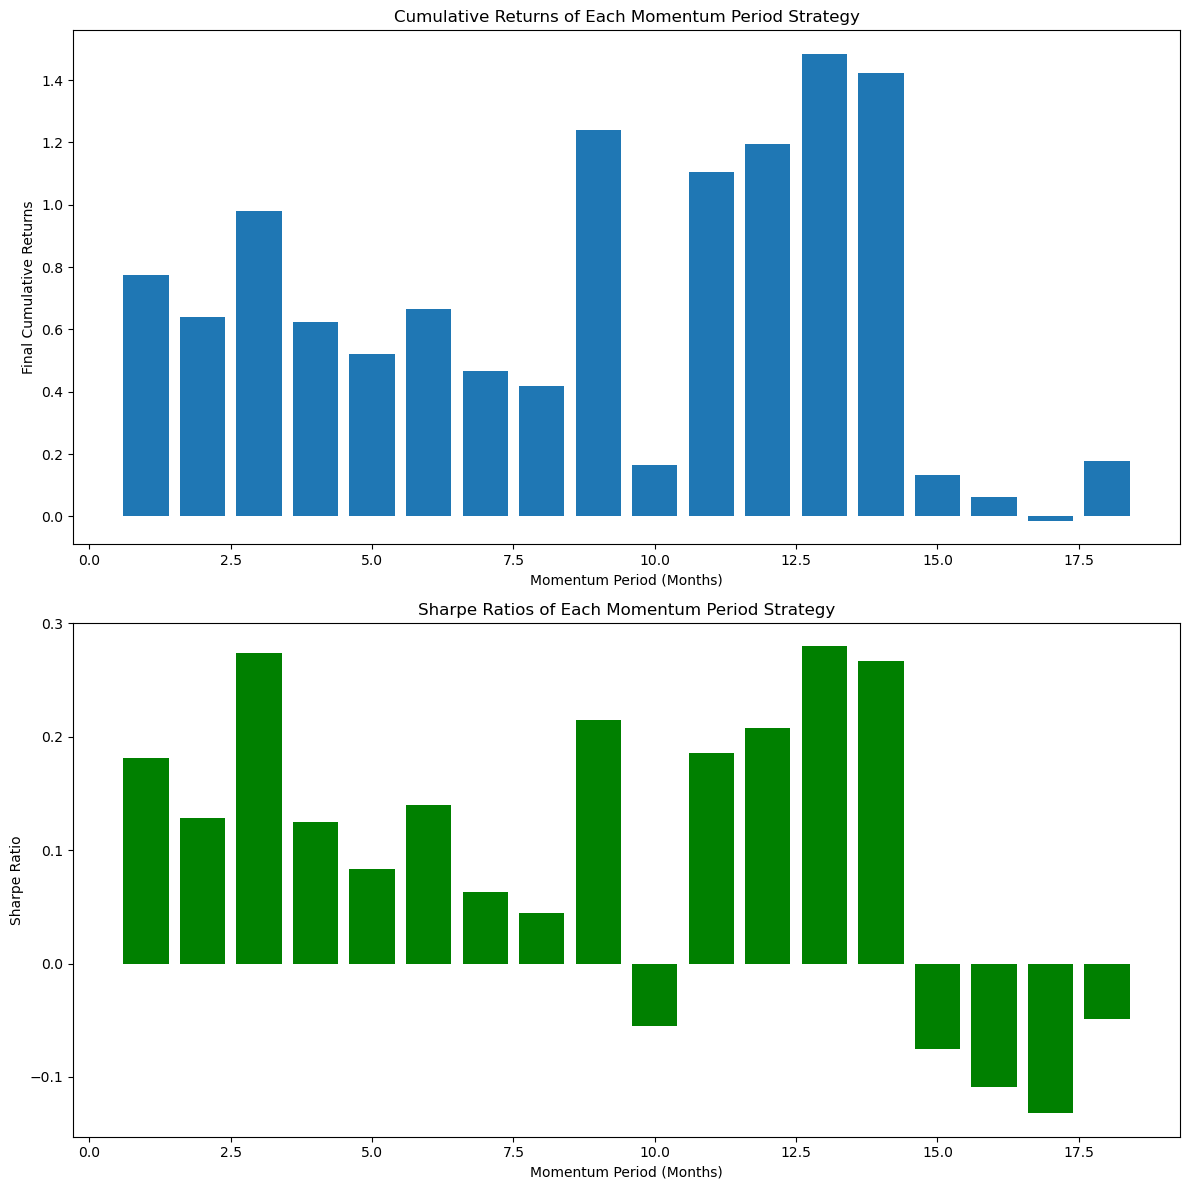

In [8]:
rolling_returns = {months: combined_returns.rolling(window=months).sum() for months in range(1, 19)}

def get_top_bottom_commodities(row, top_n=4, bottom_n=4):
    """ Function to select top and bottom commodities based on rolling returns """
    ranked = row.rank(ascending=False, method='min', na_option='keep')
    long_positions = (ranked <= top_n).astype(int)
    short_positions = (ranked > (len(row) - bottom_n)).astype(int)
    return long_positions + short_positions

# Generate trading signals and calculate returns for each period
strategy_performance = {}
sharpe_ratios = {}

for months, returns_df in rolling_returns.items():
    trading_signals = returns_df.apply(get_top_bottom_commodities, axis=1)
    
    # Calculate monthly returns for this strategy
    portfolio_monthly_returns = (trading_signals.shift(1) * combined_returns).sum(axis=1) / 10  # Normalize by number of positions
    
    # Annualize the returns and standard deviation
    annualized_returns = portfolio_monthly_returns.mean() * 12
    annualized_std_dev = portfolio_monthly_returns.std() * np.sqrt(12)
    
    # Risk-free rate adjustment (2% annualized)
    risk_free_rate = 0.02
    
    # Calculate Sharpe ratio
    sharpe_ratio = (annualized_returns - risk_free_rate) / annualized_std_dev
    sharpe_ratios[months] = sharpe_ratio
    
    # Calculate cumulative returns
    portfolio_cumulative_returns = portfolio_monthly_returns.cumsum()
    
    # Store the cumulative returns for comparison
    strategy_performance[months] = portfolio_cumulative_returns.iloc[-1]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Cumulative Returns
ax1.bar(range(1, 19), [strategy_performance[months] for months in range(1, 19)])
ax1.set_title('Cumulative Returns of Each Momentum Period Strategy')
ax1.set_xlabel('Momentum Period (Months)')
ax1.set_ylabel('Final Cumulative Returns')

# Sharpe Ratios
ax2.bar(range(1, 19), [sharpe_ratios[months] for months in range(1, 19)], color='green')
ax2.set_title('Sharpe Ratios of Each Momentum Period Strategy')
ax2.set_xlabel('Momentum Period (Months)')
ax2.set_ylabel('Sharpe Ratio')

plt.tight_layout()
plt.show()

- Search accors combinations for best SMA combination

# SMA Strategy

- try with corn

In [2]:
import matplotlib.pyplot as plt

# Ensure 'Adj Close' for Corn is in float format
corn_prices = commodity_data['Corn']['Adj Close'].astype(float)

# Convert to DataFrame for easier manipulation
corn_prices = corn_prices.to_frame(name='Adj Close')
corn_prices['daily_return'] = corn_prices['Adj Close'].pct_change()

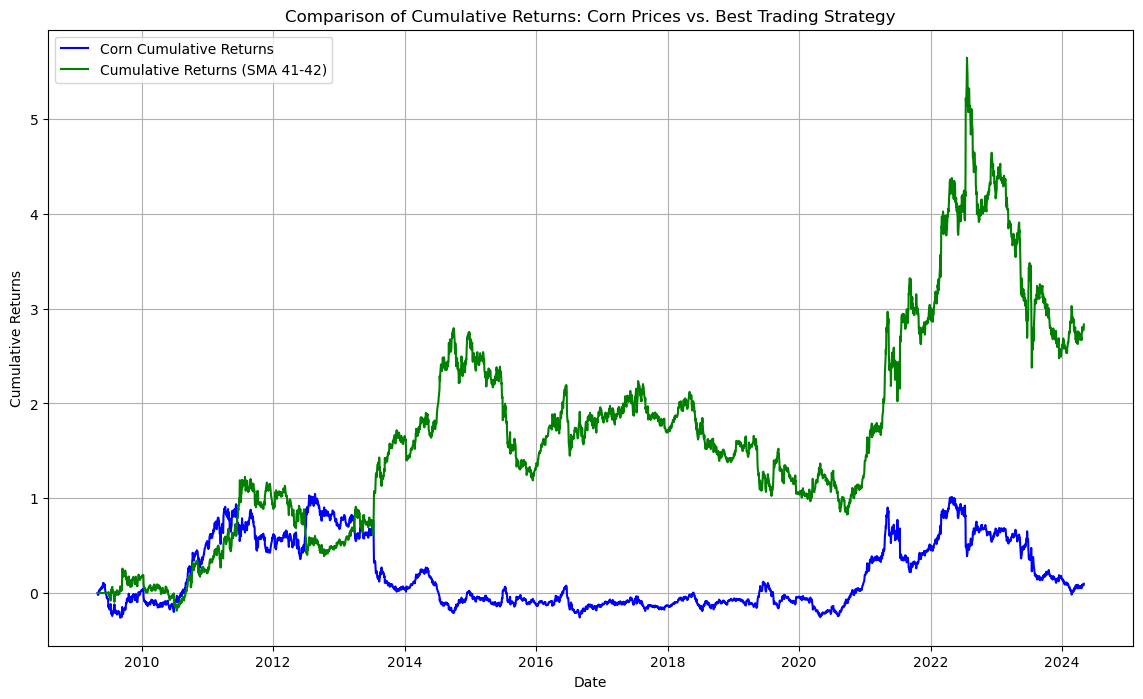

SMA (41, 42): Cumulative Return = 2.8338, Annualized Return = 6.38%, Annualized Standard Deviation = 28.36%, Sharpe Ratio = 0.163
SMA (41, 43): Cumulative Return = 2.8072, Annualized Return = 6.34%, Annualized Standard Deviation = 28.36%, Sharpe Ratio = 0.162
SMA (42, 43): Cumulative Return = 2.2099, Annualized Return = 5.51%, Annualized Standard Deviation = 28.36%, Sharpe Ratio = 0.133
SMA (35, 48): Cumulative Return = 2.0756, Annualized Return = 5.30%, Annualized Standard Deviation = 28.35%, Sharpe Ratio = 0.125
SMA (42, 46): Cumulative Return = 1.9714, Annualized Return = 5.14%, Annualized Standard Deviation = 28.35%, Sharpe Ratio = 0.119


In [18]:
moving_averages = range(1, 252, 1)
strategy_results = {}
strategy_std_dev = {}

for short_ma in moving_averages:
    for long_ma in moving_averages:
        if short_ma < long_ma:
            # Calculate moving averages on-the-fly
            SMA_short = corn_prices['Adj Close'].rolling(window=short_ma).mean()
            SMA_long = corn_prices['Adj Close'].rolling(window=long_ma).mean()

            # Generate trading signals
            signal = (SMA_short > SMA_long).astype(int) - (SMA_short < SMA_long).astype(int)

            # Calculate strategy returns using signals shifted to avoid lookahead bias
            strategy_return = corn_prices['daily_return'] * signal.shift()

            # Calculate the cumulative returns of the strategy
            cumulative_return = (1 + strategy_return).cumprod().iloc[-1] - 1

            # Store the final cumulative return and daily returns for standard deviation calculation
            strategy_results[(short_ma, long_ma)] = cumulative_return
            # Calculate and store standard deviation for each strategy
            strategy_std_dev[(short_ma, long_ma)] = strategy_return.dropna().std()  # Use dropna() to ensure NaN values don't affect the calculation

# Sort the strategies by their final cumulative returns, descending
sorted_strategies = sorted(strategy_results.items(), key=lambda x: x[1], reverse=True)[:5]

# Extract the best strategy
best_short_ma, best_long_ma = sorted_strategies[0][0]

# Calculate the best strategy for plotting
SMA_short_best = corn_prices['Adj Close'].rolling(window=best_short_ma).mean()
SMA_long_best = corn_prices['Adj Close'].rolling(window=best_long_ma).mean()
best_signal = (SMA_short_best > SMA_long_best).astype(int) - (SMA_short_best < SMA_long_best).astype(int)
best_strategy_return = corn_prices['daily_return'] * best_signal.shift()
corn_prices['best_cumulative_return'] = (1 + best_strategy_return).cumprod() - 1

# Calculate cumulative returns for corn prices from the start of the dataset
corn_prices['corn_cumulative_returns'] = (corn_prices['Adj Close'] / corn_prices['Adj Close'].iloc[0]) - 1

# Set up the figure
plt.figure(figsize=(14, 8))
ax = plt.gca()  # Get current axis

# Plotting the Cumulative Returns for Corn Prices
ax.plot(corn_prices.index, corn_prices['corn_cumulative_returns'], color='blue', label='Corn Cumulative Returns')

# Plotting the Cumulative Returns of the Best Strategy
ax.plot(corn_prices.index, corn_prices['best_cumulative_return'], color='green', label=f'Cumulative Returns (SMA {best_short_ma}-{best_long_ma})')

# Labels, legend, and formatting
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Returns', color='black')
ax.tick_params(axis='y')
ax.legend(loc='upper left')
plt.title('Comparison of Cumulative Returns: Corn Prices vs. Best Trading Strategy')
plt.grid(True)
plt.show()

# Print the top 5 strategies with their cumulative returns, annualized returns, and standard deviations
for strategy, cum_return in sorted_strategies:
    years = (corn_prices.index[-1] - corn_prices.index[0]).days / 252
    cagr = (1 + cum_return) ** (1 / years) - 1
    annualized_std_dev = np.sqrt(252) * strategy_std_dev[strategy]
    risk_free_rate = 0.0175  # 1.75% annual risk-free rate
    sharpe_ratio = (cagr - risk_free_rate) / annualized_std_dev

    print(f"SMA ({strategy[0]}, {strategy[1]}): Cumulative Return = {cum_return:.4f}, "
          f"Annualized Return = {100 * cagr:.2f}%, Annualized Standard Deviation = {100 * annualized_std_dev:.2f}%, "
          f"Sharpe Ratio = {sharpe_ratio:.3f}")

- write function

In [9]:
commodity_data

{'Crude Oil':                  Open       High        Low      Close  Adj Close  Volume  \
 Date                                                                        
 2009-05-11  58.490002  58.630001  56.779999  58.500000  58.500000  290030   
 2009-05-12  58.099998  60.080002  57.810001  58.849998  58.849998  305957   
 2009-05-13  59.290001  59.900002  57.410000  58.020000  58.020000  311802   
 2009-05-14  57.730000  59.000000  56.549999  58.619999  58.619999  260456   
 2009-05-15  58.540001  58.880001  56.070000  56.340000  56.340000  216089   
 ...               ...        ...        ...        ...        ...     ...   
 2024-05-03  79.070000  79.629997  77.959999  78.110001  78.110001  324438   
 2024-05-06  78.160004  79.089996  77.910004  78.480003  78.480003  297369   
 2024-05-07  78.720001  79.169998  77.550003  78.379997  78.379997  327593   
 2024-05-08  78.339996  79.269997  76.889999  78.989998  78.989998  327593   
 2024-05-09  79.230003  79.800003  78.910004  79.62

In [19]:
def analyze_sma_strategy(df, adj_close_col='Adj Close', daily_return_col='daily_return', risk_free_rate=0.0175):
    moving_averages = range(1, 252, 1)
    strategy_results = {}
    strategy_std_dev = {}

    for short_ma in moving_averages:
        for long_ma in moving_averages:
            if short_ma < long_ma:
                # Calculate moving averages on-the-fly
                SMA_short = df[adj_close_col].rolling(window=short_ma).mean()
                SMA_long = df[adj_close_col].rolling(window=long_ma).mean()

                # Generate trading signals
                signal = (SMA_short > SMA_long).astype(int) - (SMA_short < SMA_long).astype(int)

                # Calculate strategy returns using signals shifted to avoid lookahead bias
                strategy_return = df[daily_return_col] * signal.shift()

                # Calculate the cumulative returns of the strategy
                cumulative_return = (1 + strategy_return).cumprod().iloc[-1] - 1

                # Store the final cumulative return and daily returns for standard deviation calculation
                strategy_results[(short_ma, long_ma)] = cumulative_return
                strategy_std_dev[(short_ma, long_ma)] = strategy_return.dropna().std()  # Use dropna() to ensure NaN values don't affect the calculation

    # Sort the strategies by their final cumulative returns, descending
    sorted_strategies = sorted(strategy_results.items(), key=lambda x: x[1], reverse=True)[:5]

    # Extract the best strategy
    best_short_ma, best_long_ma = sorted_strategies[0][0]

    # Calculate the best strategy for plotting
    SMA_short_best = df[adj_close_col].rolling(window=best_short_ma).mean()
    SMA_long_best = df[adj_close_col].rolling(window=best_long_ma).mean()
    best_signal = (SMA_short_best > SMA_long_best).astype(int) - (SMA_short_best < SMA_long_best).astype(int)
    best_strategy_return = df[daily_return_col] * best_signal.shift()
    df['best_cumulative_return'] = (1 + best_strategy_return).cumprod() - 1

    # Calculate cumulative returns for the commodity prices from the start of the dataset
    df['commodity_cumulative_returns'] = (df[adj_close_col] / df[adj_close_col].iloc[0]) - 1

    # Set up the figure
    plt.figure(figsize=(14, 8))
    ax = plt.gca()  # Get current axis

    # Plotting the Cumulative Returns for Commodity Prices
    ax.plot(df.index, df['commodity_cumulative_returns'], color='blue', label=f'{adj_close_col} Cumulative Returns')

    # Plotting the Cumulative Returns of the Best Strategy
    ax.plot(df.index, df['best_cumulative_return'], color='green', label=f'Cumulative Returns (SMA {best_short_ma}-{best_long_ma})')

    # Labels, legend, and formatting
    ax.set_xlabel('Date')
    ax.set_ylabel('Cumulative Returns', color='black')
    ax.tick_params(axis='y')
    ax.legend(loc='upper left')
    plt.title(f'Comparison of Cumulative Returns: {adj_close_col} Prices vs. Best Trading Strategy')
    plt.grid(True)
    plt.show()

    # Print the top 5 strategies with their cumulative returns, annualized returns, and standard deviations
    for strategy, cum_return in sorted_strategies:
        years = (df.index[-1] - df.index[0]).days / 252
        cagr = (1 + cum_return) ** (1 / years) - 1
        annualized_std_dev = np.sqrt(252) * strategy_std_dev[strategy]
        sharpe_ratio = (cagr - risk_free_rate) / annualized_std_dev

        print(f"SMA ({strategy[0]}, {strategy[1]}): Cumulative Return = {cum_return:.4f}, "
              f"Annualized Return = {100 * cagr:.2f}%, Annualized Standard Deviation = {100 * annualized_std_dev:.2f}%, "
              f"Sharpe Ratio = {sharpe_ratio:.3f}")

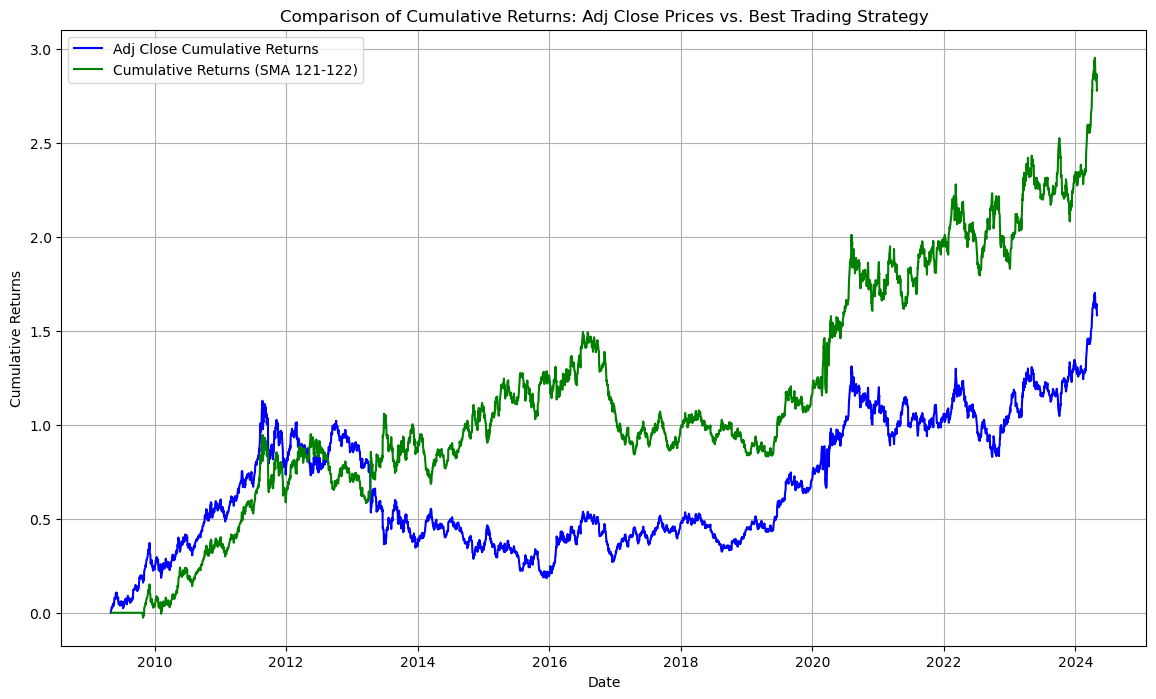

SMA (121, 122): Cumulative Return = 2.7815, Annualized Return = 6.31%, Annualized Standard Deviation = 15.74%, Sharpe Ratio = 0.290
SMA (115, 128): Cumulative Return = 2.5030, Annualized Return = 5.94%, Annualized Standard Deviation = 15.73%, Sharpe Ratio = 0.266
SMA (42, 50): Cumulative Return = 2.4012, Annualized Return = 5.79%, Annualized Standard Deviation = 15.86%, Sharpe Ratio = 0.255
SMA (121, 123): Cumulative Return = 2.3898, Annualized Return = 5.78%, Annualized Standard Deviation = 15.74%, Sharpe Ratio = 0.256
SMA (115, 129): Cumulative Return = 2.2104, Annualized Return = 5.51%, Annualized Standard Deviation = 15.72%, Sharpe Ratio = 0.239


In [26]:
gold_prices = commodity_data['Gold']['Adj Close'].astype(float)

# Convert to DataFrame for easier manipulation
gold_prices = gold_prices.to_frame(name='Adj Close')
# Calculate daily returns
gold_prices['daily_return'] = gold_prices['Adj Close'].pct_change()

analyze_sma_strategy(gold_prices, 'Adj Close', 'daily_return')

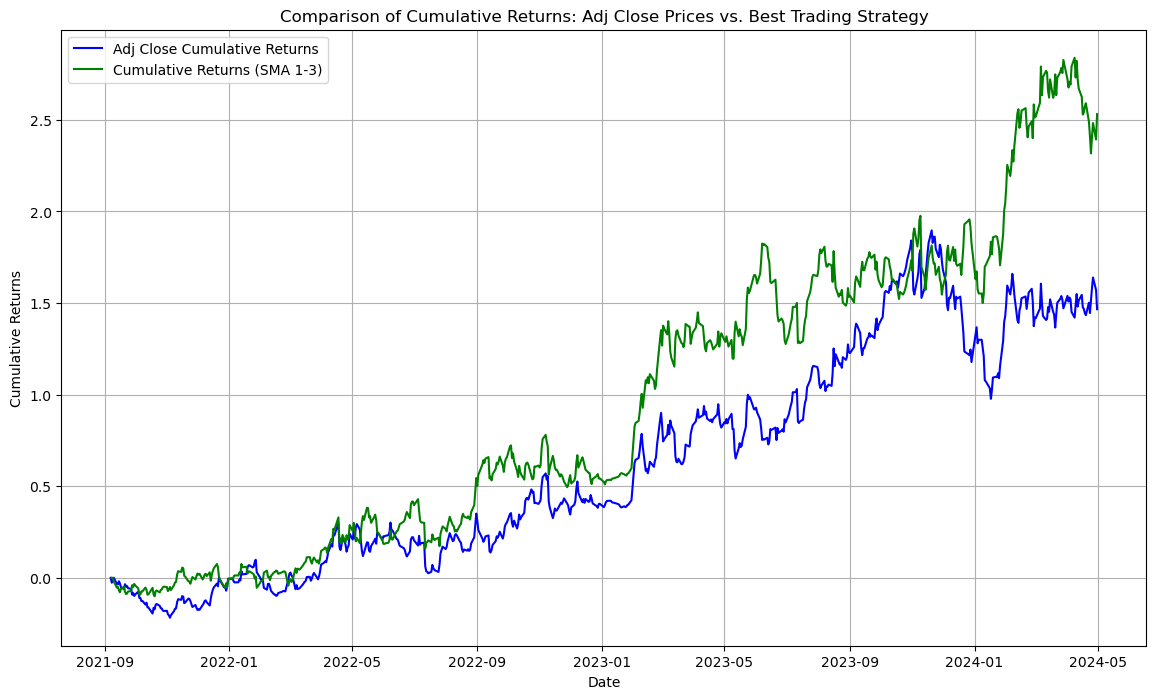

SMA (1, 3): Cumulative Return = 2.5312, Annualized Return = 38.97%, Annualized Standard Deviation = 40.01%, Sharpe Ratio = 0.930
SMA (1, 4): Cumulative Return = 2.4275, Annualized Return = 37.90%, Annualized Standard Deviation = 40.00%, Sharpe Ratio = 0.904
SMA (119, 121): Cumulative Return = 2.3867, Annualized Return = 37.47%, Annualized Standard Deviation = 37.26%, Sharpe Ratio = 0.959
SMA (118, 121): Cumulative Return = 2.2182, Annualized Return = 35.65%, Annualized Standard Deviation = 37.27%, Sharpe Ratio = 0.910
SMA (118, 122): Cumulative Return = 2.2099, Annualized Return = 35.56%, Annualized Standard Deviation = 37.23%, Sharpe Ratio = 0.908


In [28]:
orange_juice_prices = commodity_data['Frozen Orange Juice']['Adj Close'].astype(float)

# Convert to DataFrame for easier manipulation
orange_juice_prices = orange_juice_prices.to_frame(name='Adj Close')
# Calculate daily returns
orange_juice_prices['daily_return'] = orange_juice_prices['Adj Close'].pct_change()

analyze_sma_strategy(orange_juice_prices, 'Adj Close', 'daily_return')

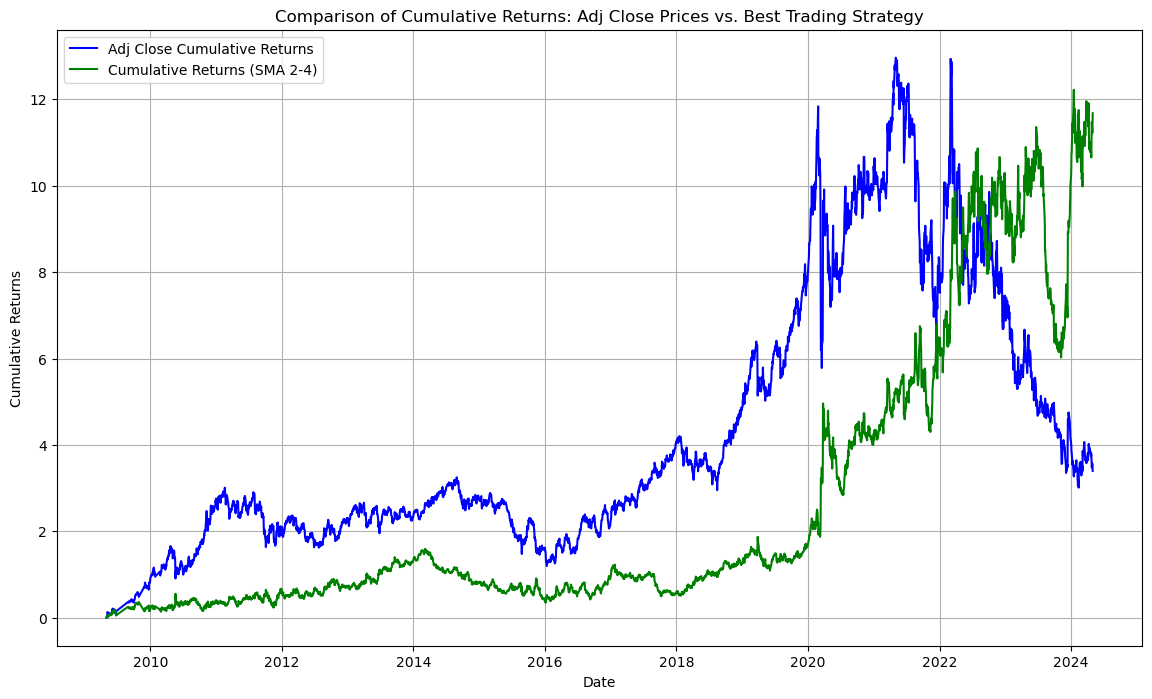

SMA (2, 4): Cumulative Return = 11.6796, Annualized Return = 12.39%, Annualized Standard Deviation = 35.80%, Sharpe Ratio = 0.297
SMA (161, 163): Cumulative Return = 7.7220, Annualized Return = 10.47%, Annualized Standard Deviation = 34.61%, Sharpe Ratio = 0.252
SMA (161, 164): Cumulative Return = 7.3831, Annualized Return = 10.27%, Annualized Standard Deviation = 34.61%, Sharpe Ratio = 0.246
SMA (160, 164): Cumulative Return = 6.9003, Annualized Return = 9.97%, Annualized Standard Deviation = 34.61%, Sharpe Ratio = 0.238
SMA (2, 5): Cumulative Return = 6.8060, Annualized Return = 9.91%, Annualized Standard Deviation = 35.80%, Sharpe Ratio = 0.228


In [30]:
palladium_prices = commodity_data['Palladium']['Adj Close'].astype(float)

# Convert to DataFrame for easier manipulation
palladium_prices = palladium_prices.to_frame(name='Adj Close')
# Calculate daily returns
palladium_prices['daily_return'] = palladium_prices['Adj Close'].pct_change()

analyze_sma_strategy(palladium_prices, 'Adj Close', 'daily_return')

- Apply to all commodity data

Analyzing Crude Oil...


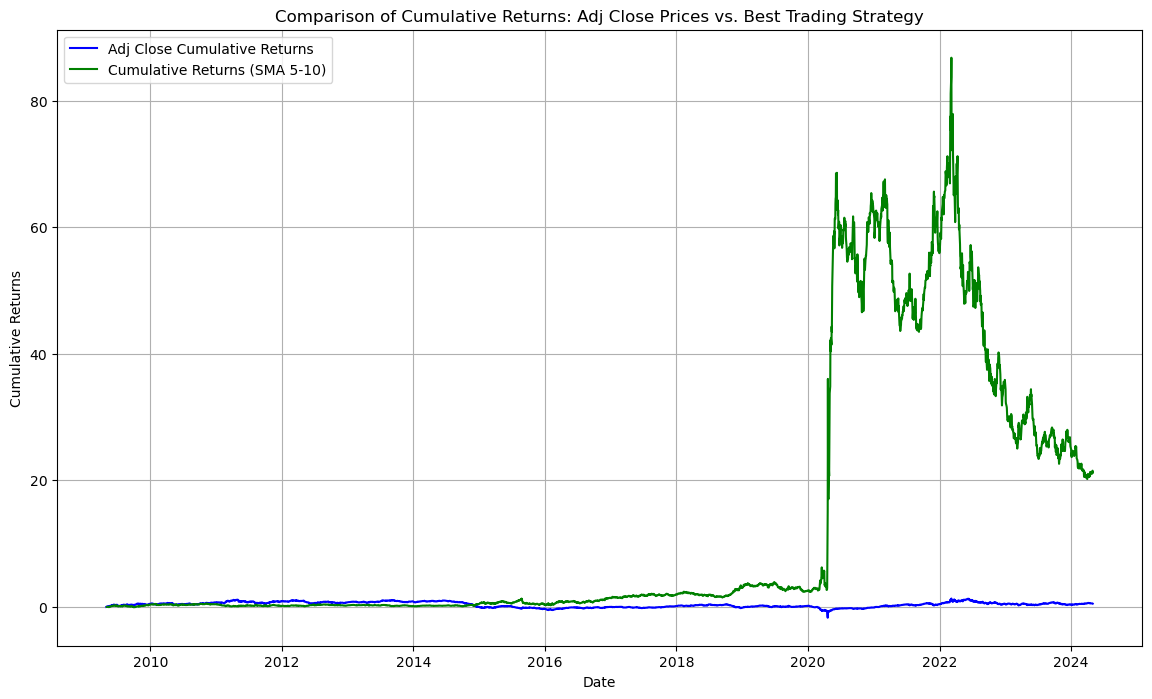

SMA (5, 10): Cumulative Return = 21.2027, Annualized Return = 15.33%, Annualized Standard Deviation = 94.97%, Sharpe Ratio = 0.143
SMA (4, 14): Cumulative Return = 16.7550, Annualized Return = 14.15%, Annualized Standard Deviation = 94.95%, Sharpe Ratio = 0.131
SMA (6, 9): Cumulative Return = 16.1799, Annualized Return = 13.97%, Annualized Standard Deviation = 94.97%, Sharpe Ratio = 0.129
SMA (2, 11): Cumulative Return = 15.9944, Annualized Return = 13.92%, Annualized Standard Deviation = 94.97%, Sharpe Ratio = 0.128
SMA (13, 21): Cumulative Return = 13.8745, Annualized Return = 13.22%, Annualized Standard Deviation = 94.95%, Sharpe Ratio = 0.121
Analyzing Gold...


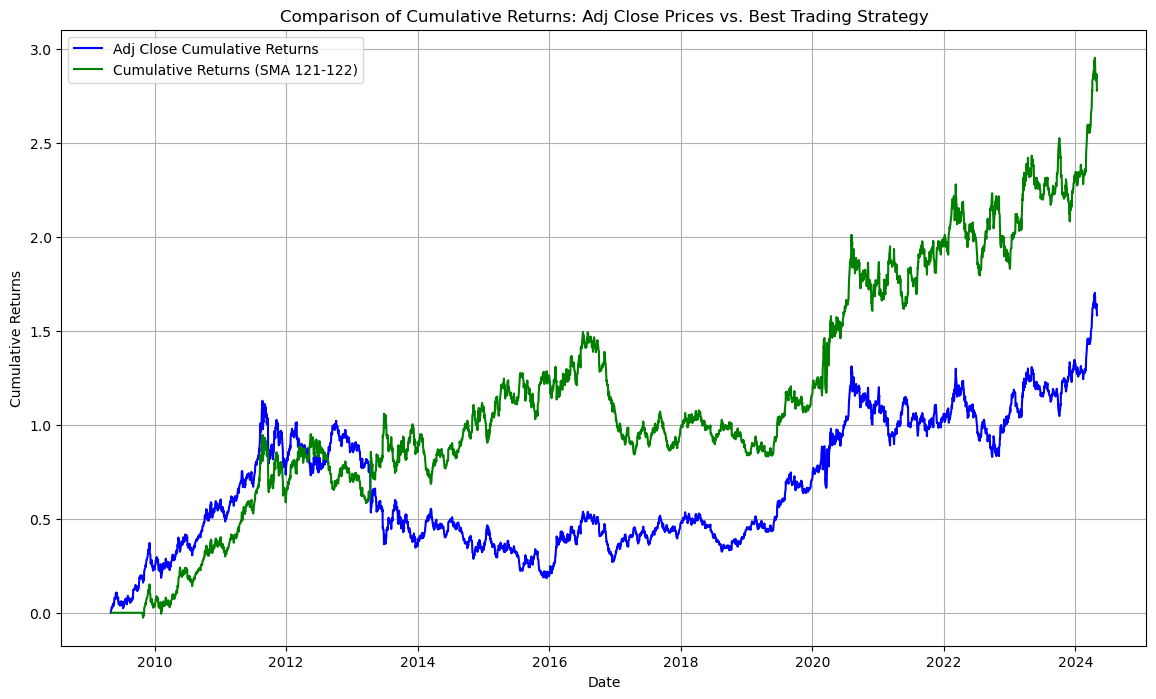

SMA (121, 122): Cumulative Return = 2.7815, Annualized Return = 6.31%, Annualized Standard Deviation = 15.74%, Sharpe Ratio = 0.290
SMA (115, 128): Cumulative Return = 2.5030, Annualized Return = 5.94%, Annualized Standard Deviation = 15.73%, Sharpe Ratio = 0.266
SMA (42, 50): Cumulative Return = 2.4012, Annualized Return = 5.79%, Annualized Standard Deviation = 15.86%, Sharpe Ratio = 0.255
SMA (121, 123): Cumulative Return = 2.3898, Annualized Return = 5.78%, Annualized Standard Deviation = 15.74%, Sharpe Ratio = 0.256
SMA (115, 129): Cumulative Return = 2.2104, Annualized Return = 5.51%, Annualized Standard Deviation = 15.72%, Sharpe Ratio = 0.239
Analyzing Natural Gas...


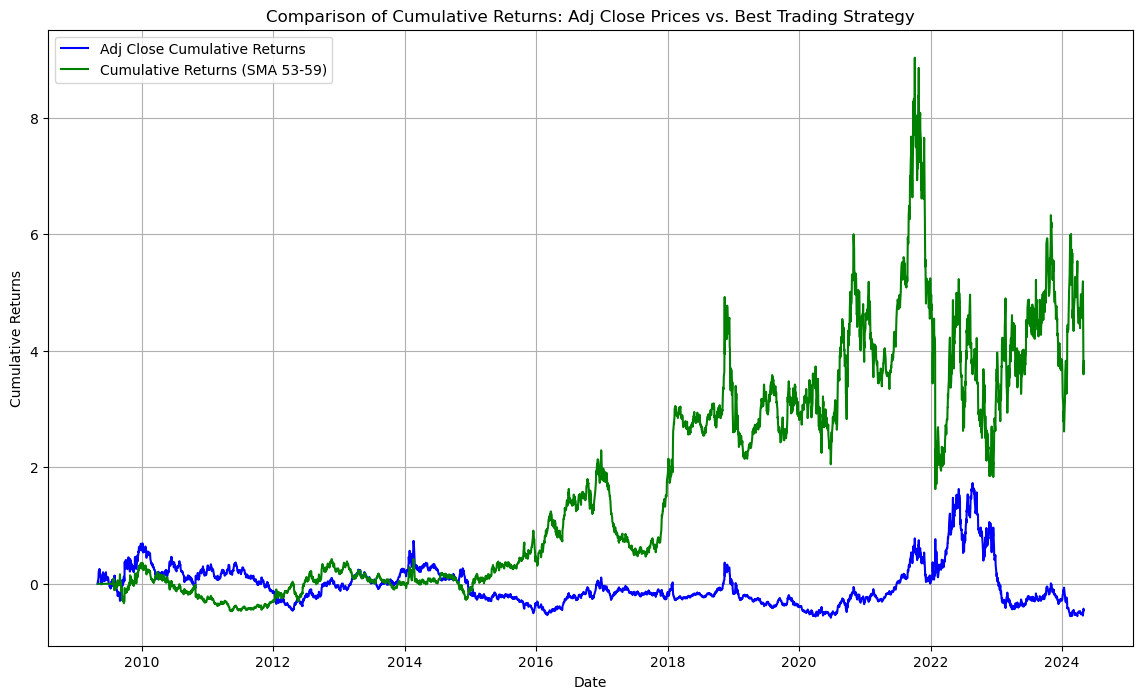

SMA (53, 59): Cumulative Return = 3.8248, Annualized Return = 7.51%, Annualized Standard Deviation = 57.25%, Sharpe Ratio = 0.101
SMA (52, 59): Cumulative Return = 3.5956, Annualized Return = 7.27%, Annualized Standard Deviation = 57.25%, Sharpe Ratio = 0.096
SMA (55, 58): Cumulative Return = 3.0850, Annualized Return = 6.69%, Annualized Standard Deviation = 57.27%, Sharpe Ratio = 0.086
SMA (54, 59): Cumulative Return = 2.9584, Annualized Return = 6.53%, Annualized Standard Deviation = 57.26%, Sharpe Ratio = 0.084
SMA (56, 58): Cumulative Return = 2.6634, Annualized Return = 6.15%, Annualized Standard Deviation = 57.27%, Sharpe Ratio = 0.077
Analyzing Silver...


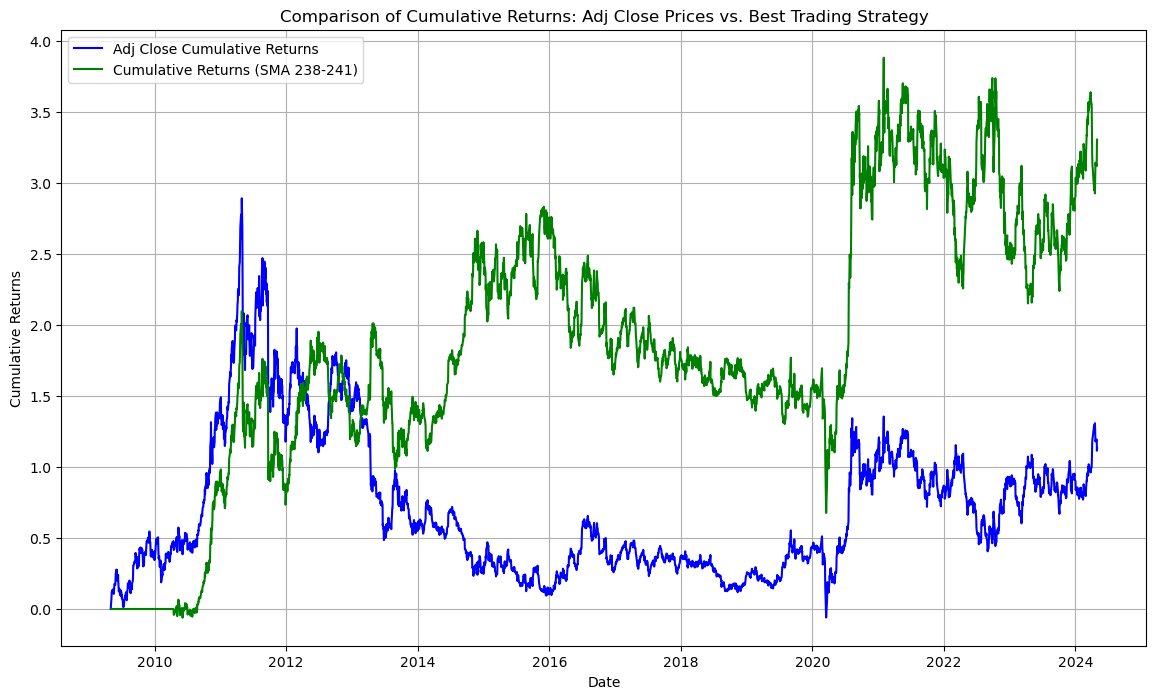

SMA (238, 241): Cumulative Return = 3.3063, Annualized Return = 6.95%, Annualized Standard Deviation = 29.50%, Sharpe Ratio = 0.176
SMA (237, 241): Cumulative Return = 2.6512, Annualized Return = 6.14%, Annualized Standard Deviation = 29.50%, Sharpe Ratio = 0.149
SMA (233, 245): Cumulative Return = 2.5195, Annualized Return = 5.96%, Annualized Standard Deviation = 29.48%, Sharpe Ratio = 0.143
SMA (237, 242): Cumulative Return = 2.5147, Annualized Return = 5.95%, Annualized Standard Deviation = 29.48%, Sharpe Ratio = 0.143
SMA (229, 246): Cumulative Return = 2.3764, Annualized Return = 5.76%, Annualized Standard Deviation = 29.48%, Sharpe Ratio = 0.136
Analyzing Copper...


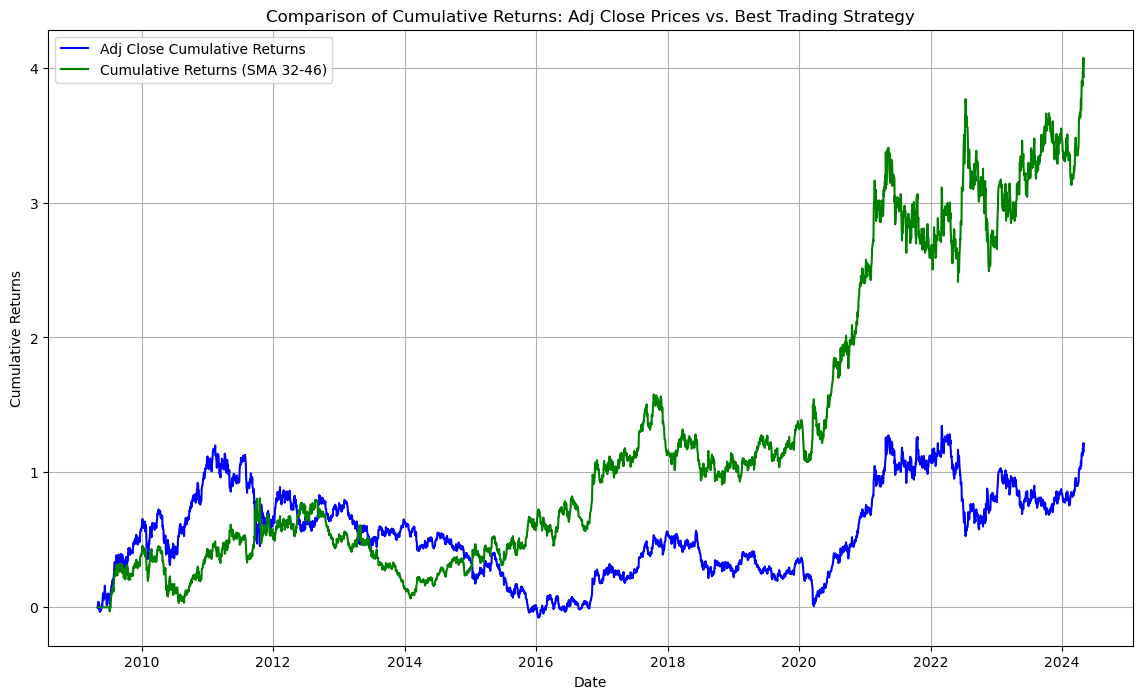

SMA (32, 46): Cumulative Return = 3.9325, Annualized Return = 7.62%, Annualized Standard Deviation = 22.73%, Sharpe Ratio = 0.258
SMA (32, 47): Cumulative Return = 3.6558, Annualized Return = 7.33%, Annualized Standard Deviation = 22.72%, Sharpe Ratio = 0.246
SMA (31, 48): Cumulative Return = 3.2975, Annualized Return = 6.94%, Annualized Standard Deviation = 22.70%, Sharpe Ratio = 0.228
SMA (39, 43): Cumulative Return = 3.1211, Annualized Return = 6.73%, Annualized Standard Deviation = 22.75%, Sharpe Ratio = 0.219
SMA (30, 48): Cumulative Return = 3.0895, Annualized Return = 6.69%, Annualized Standard Deviation = 22.70%, Sharpe Ratio = 0.218
Analyzing Corn...


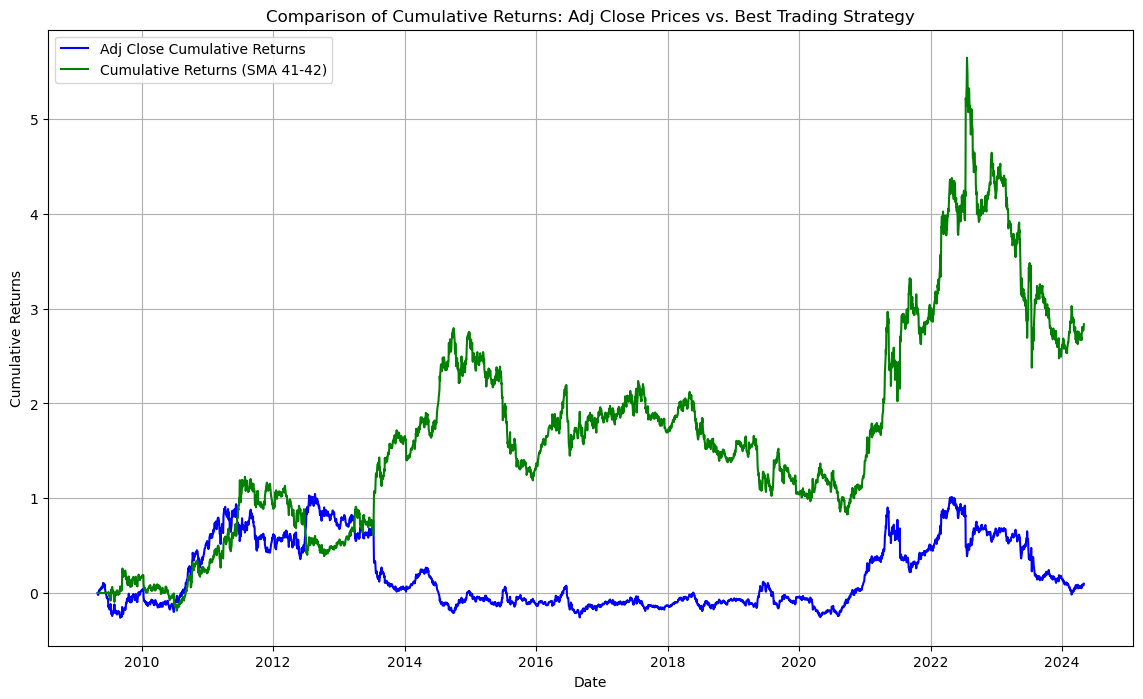

SMA (41, 42): Cumulative Return = 2.8360, Annualized Return = 6.38%, Annualized Standard Deviation = 28.36%, Sharpe Ratio = 0.163
SMA (41, 43): Cumulative Return = 2.8093, Annualized Return = 6.34%, Annualized Standard Deviation = 28.36%, Sharpe Ratio = 0.162
SMA (42, 43): Cumulative Return = 2.2117, Annualized Return = 5.51%, Annualized Standard Deviation = 28.36%, Sharpe Ratio = 0.133
SMA (35, 48): Cumulative Return = 2.0773, Annualized Return = 5.31%, Annualized Standard Deviation = 28.35%, Sharpe Ratio = 0.125
SMA (42, 46): Cumulative Return = 1.9731, Annualized Return = 5.14%, Annualized Standard Deviation = 28.35%, Sharpe Ratio = 0.120
Analyzing Soybeans...


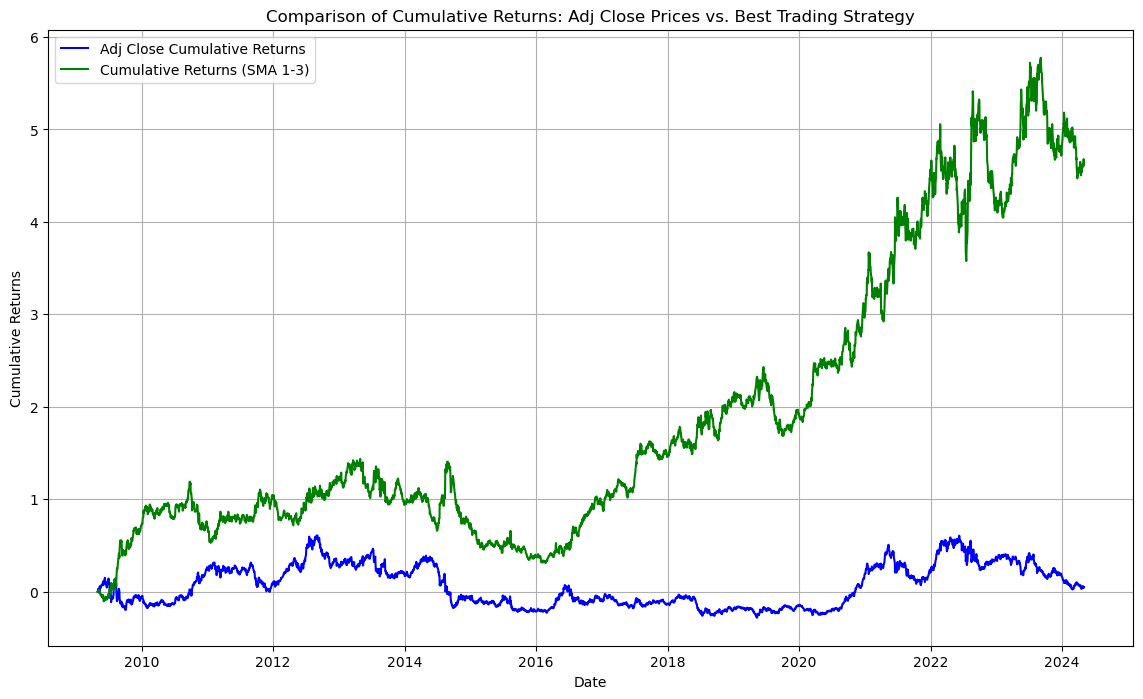

SMA (1, 3): Cumulative Return = 4.6176, Annualized Return = 8.26%, Annualized Standard Deviation = 22.56%, Sharpe Ratio = 0.289
SMA (53, 60): Cumulative Return = 2.8694, Annualized Return = 6.42%, Annualized Standard Deviation = 22.21%, Sharpe Ratio = 0.210
SMA (55, 59): Cumulative Return = 2.8543, Annualized Return = 6.40%, Annualized Standard Deviation = 22.21%, Sharpe Ratio = 0.209
SMA (54, 58): Cumulative Return = 2.6989, Annualized Return = 6.20%, Annualized Standard Deviation = 22.21%, Sharpe Ratio = 0.200
SMA (54, 59): Cumulative Return = 2.6420, Annualized Return = 6.13%, Annualized Standard Deviation = 22.21%, Sharpe Ratio = 0.197
Analyzing Wheat...


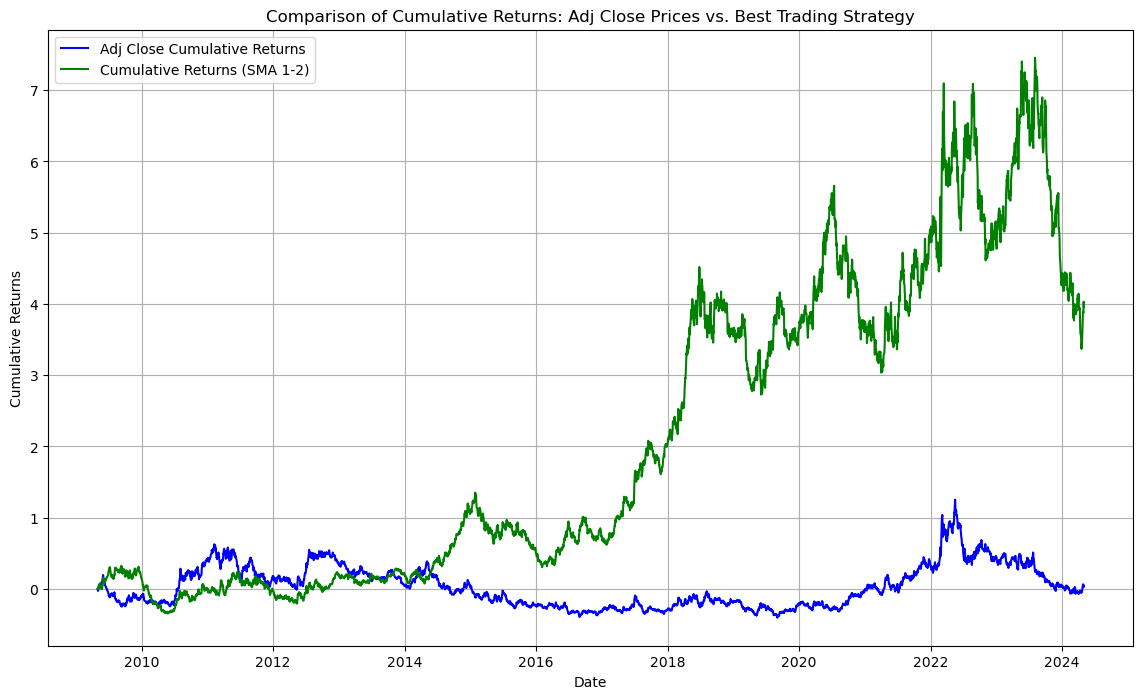

SMA (1, 2): Cumulative Return = 3.9615, Annualized Return = 7.65%, Annualized Standard Deviation = 30.07%, Sharpe Ratio = 0.196
SMA (1, 3): Cumulative Return = 2.9797, Annualized Return = 6.56%, Annualized Standard Deviation = 30.25%, Sharpe Ratio = 0.159
SMA (2, 6): Cumulative Return = 2.6582, Annualized Return = 6.15%, Annualized Standard Deviation = 30.38%, Sharpe Ratio = 0.145
SMA (153, 156): Cumulative Return = 2.6195, Annualized Return = 6.09%, Annualized Standard Deviation = 29.71%, Sharpe Ratio = 0.146
SMA (154, 156): Cumulative Return = 2.5292, Annualized Return = 5.97%, Annualized Standard Deviation = 29.71%, Sharpe Ratio = 0.142
Analyzing Coffee...


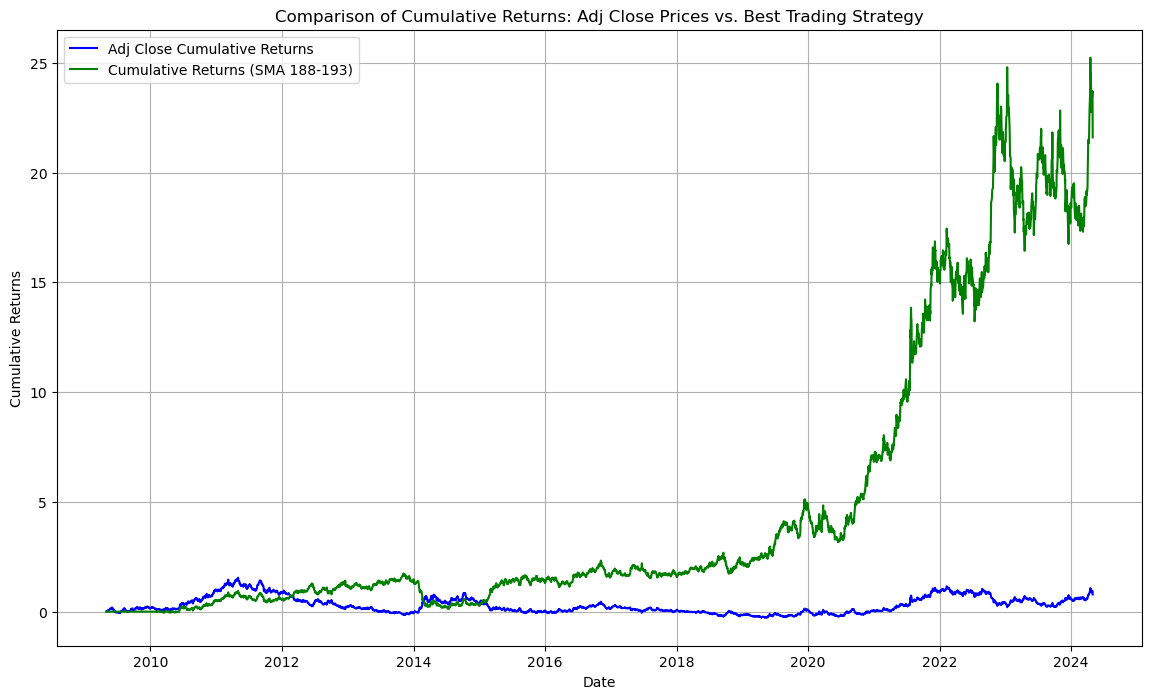

SMA (188, 193): Cumulative Return = 21.5998, Annualized Return = 15.42%, Annualized Standard Deviation = 32.30%, Sharpe Ratio = 0.423
SMA (196, 197): Cumulative Return = 19.8290, Annualized Return = 14.99%, Annualized Standard Deviation = 32.30%, Sharpe Ratio = 0.410
SMA (193, 196): Cumulative Return = 19.5448, Annualized Return = 14.92%, Annualized Standard Deviation = 32.30%, Sharpe Ratio = 0.408
SMA (193, 197): Cumulative Return = 18.0116, Annualized Return = 14.51%, Annualized Standard Deviation = 32.30%, Sharpe Ratio = 0.395
SMA (195, 197): Cumulative Return = 17.4659, Annualized Return = 14.36%, Annualized Standard Deviation = 32.30%, Sharpe Ratio = 0.390
Analyzing Cotton...


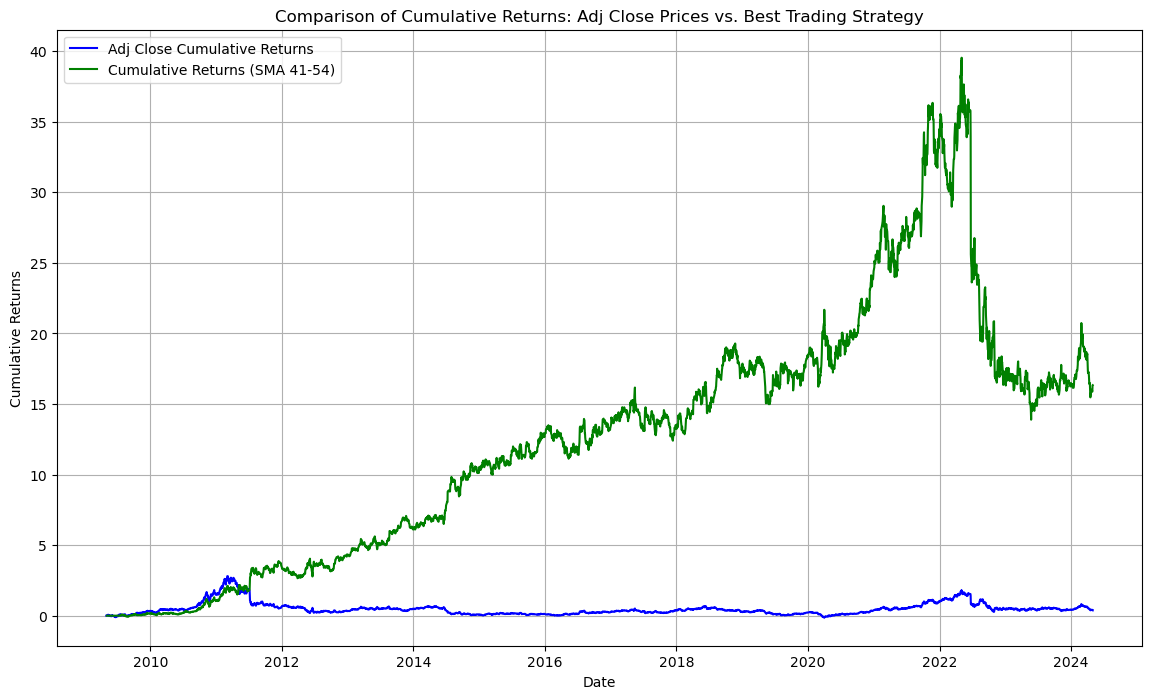

SMA (41, 54): Cumulative Return = 16.3380, Annualized Return = 14.02%, Annualized Standard Deviation = 28.20%, Sharpe Ratio = 0.435
SMA (40, 55): Cumulative Return = 11.4255, Annualized Return = 12.29%, Annualized Standard Deviation = 28.20%, Sharpe Ratio = 0.374
SMA (40, 54): Cumulative Return = 10.0419, Annualized Return = 11.68%, Annualized Standard Deviation = 28.21%, Sharpe Ratio = 0.352
SMA (41, 55): Cumulative Return = 9.4131, Annualized Return = 11.38%, Annualized Standard Deviation = 28.20%, Sharpe Ratio = 0.341
SMA (46, 47): Cumulative Return = 8.5775, Annualized Return = 10.95%, Annualized Standard Deviation = 28.27%, Sharpe Ratio = 0.325
Analyzing Sugar...


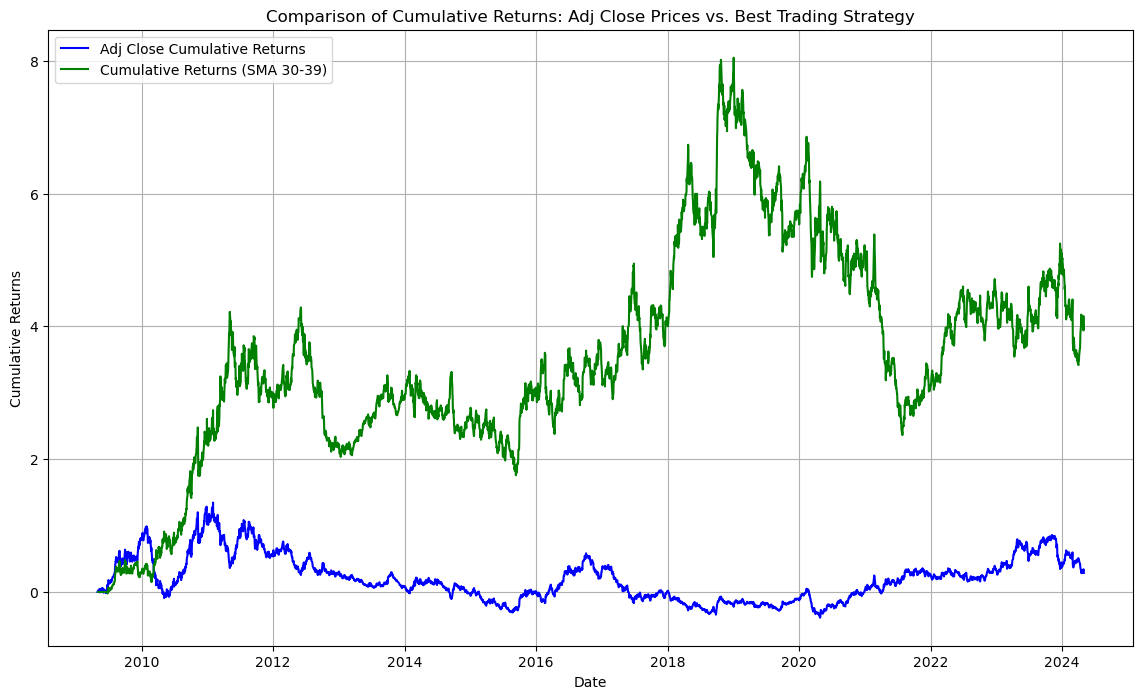

SMA (30, 39): Cumulative Return = 4.1453, Annualized Return = 7.83%, Annualized Standard Deviation = 31.38%, Sharpe Ratio = 0.194
SMA (10, 13): Cumulative Return = 4.1392, Annualized Return = 7.82%, Annualized Standard Deviation = 31.49%, Sharpe Ratio = 0.193
SMA (23, 48): Cumulative Return = 3.8504, Annualized Return = 7.53%, Annualized Standard Deviation = 31.31%, Sharpe Ratio = 0.185
SMA (17, 57): Cumulative Return = 3.7120, Annualized Return = 7.39%, Annualized Standard Deviation = 31.30%, Sharpe Ratio = 0.180
SMA (22, 48): Cumulative Return = 3.6993, Annualized Return = 7.38%, Annualized Standard Deviation = 31.31%, Sharpe Ratio = 0.180
Analyzing Aluminum...


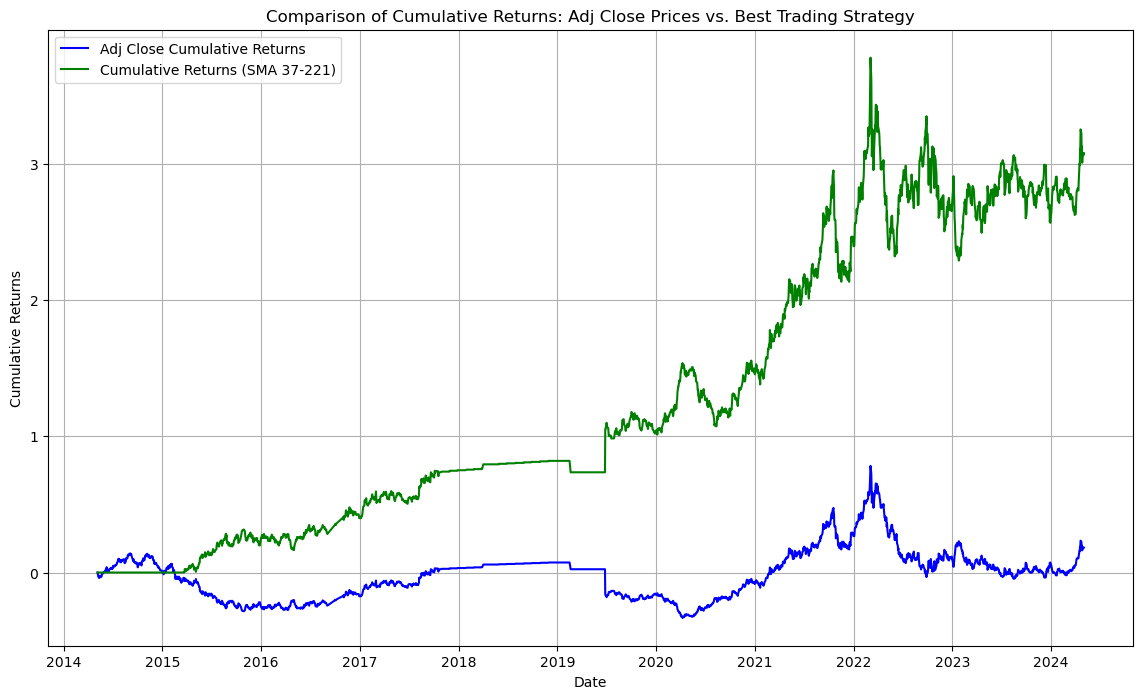

SMA (37, 221): Cumulative Return = 3.0777, Annualized Return = 10.20%, Annualized Standard Deviation = 18.55%, Sharpe Ratio = 0.455
SMA (19, 247): Cumulative Return = 3.0751, Annualized Return = 10.19%, Annualized Standard Deviation = 18.48%, Sharpe Ratio = 0.457
SMA (37, 220): Cumulative Return = 3.0581, Annualized Return = 10.16%, Annualized Standard Deviation = 18.56%, Sharpe Ratio = 0.453
SMA (35, 227): Cumulative Return = 3.0481, Annualized Return = 10.14%, Annualized Standard Deviation = 18.53%, Sharpe Ratio = 0.453
SMA (17, 251): Cumulative Return = 3.0468, Annualized Return = 10.14%, Annualized Standard Deviation = 18.48%, Sharpe Ratio = 0.454
Analyzing Platinum...


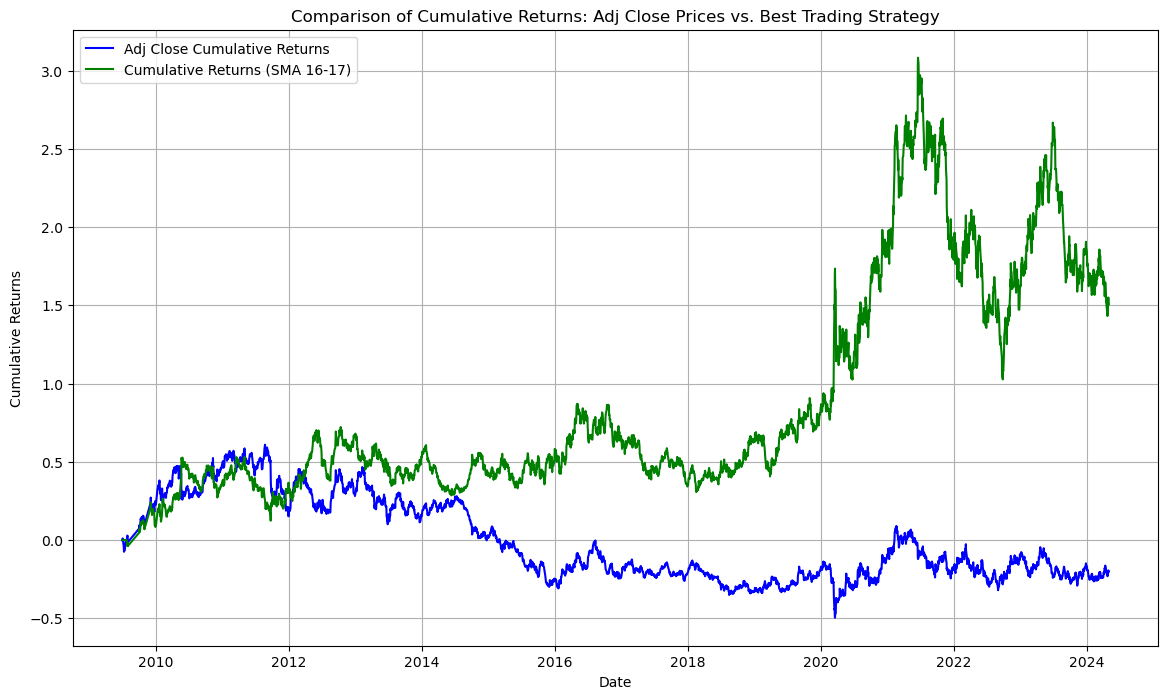

SMA (16, 17): Cumulative Return = 1.5067, Annualized Return = 4.37%, Annualized Standard Deviation = 25.06%, Sharpe Ratio = 0.104
SMA (15, 17): Cumulative Return = 1.3572, Annualized Return = 4.07%, Annualized Standard Deviation = 25.06%, Sharpe Ratio = 0.092
SMA (2, 5): Cumulative Return = 1.0627, Annualized Return = 3.42%, Annualized Standard Deviation = 25.09%, Sharpe Ratio = 0.067
SMA (15, 16): Cumulative Return = 0.6487, Annualized Return = 2.35%, Annualized Standard Deviation = 25.06%, Sharpe Ratio = 0.024
SMA (12, 18): Cumulative Return = 0.6168, Annualized Return = 2.26%, Annualized Standard Deviation = 25.05%, Sharpe Ratio = 0.020
Analyzing Palladium...


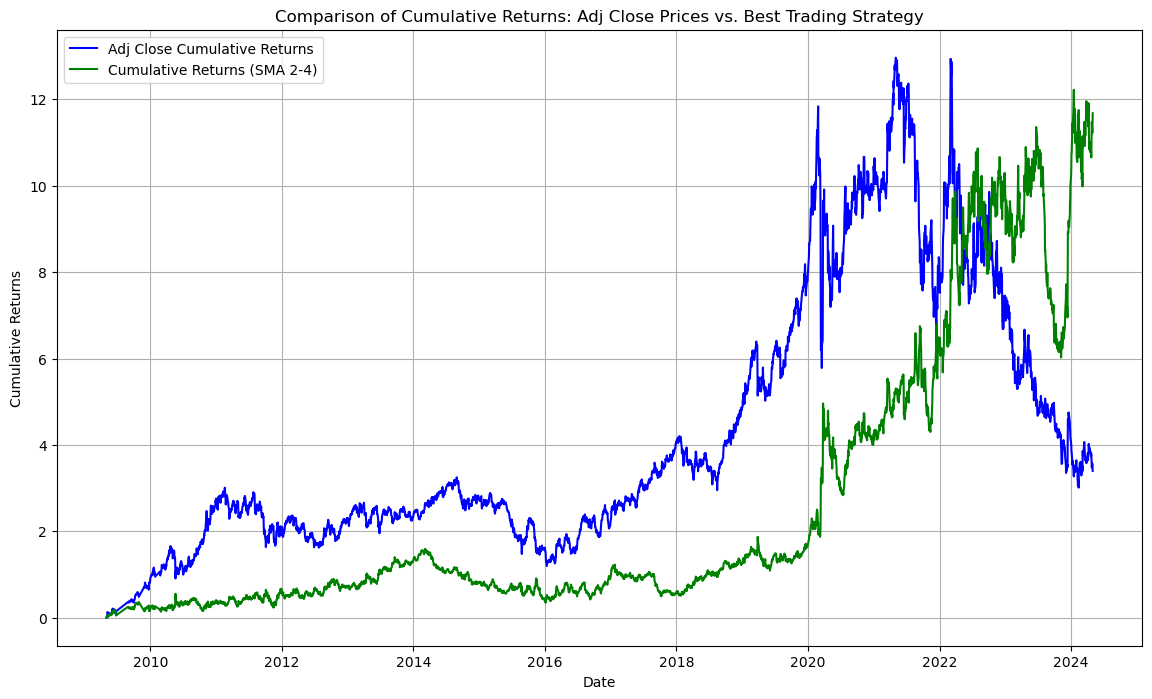

SMA (2, 4): Cumulative Return = 11.6796, Annualized Return = 12.39%, Annualized Standard Deviation = 35.80%, Sharpe Ratio = 0.297
SMA (161, 163): Cumulative Return = 7.7220, Annualized Return = 10.47%, Annualized Standard Deviation = 34.61%, Sharpe Ratio = 0.252
SMA (161, 164): Cumulative Return = 7.3831, Annualized Return = 10.27%, Annualized Standard Deviation = 34.61%, Sharpe Ratio = 0.246
SMA (160, 164): Cumulative Return = 6.9003, Annualized Return = 9.97%, Annualized Standard Deviation = 34.61%, Sharpe Ratio = 0.238
SMA (2, 5): Cumulative Return = 6.8060, Annualized Return = 9.91%, Annualized Standard Deviation = 35.80%, Sharpe Ratio = 0.228
Analyzing Brent Crude...


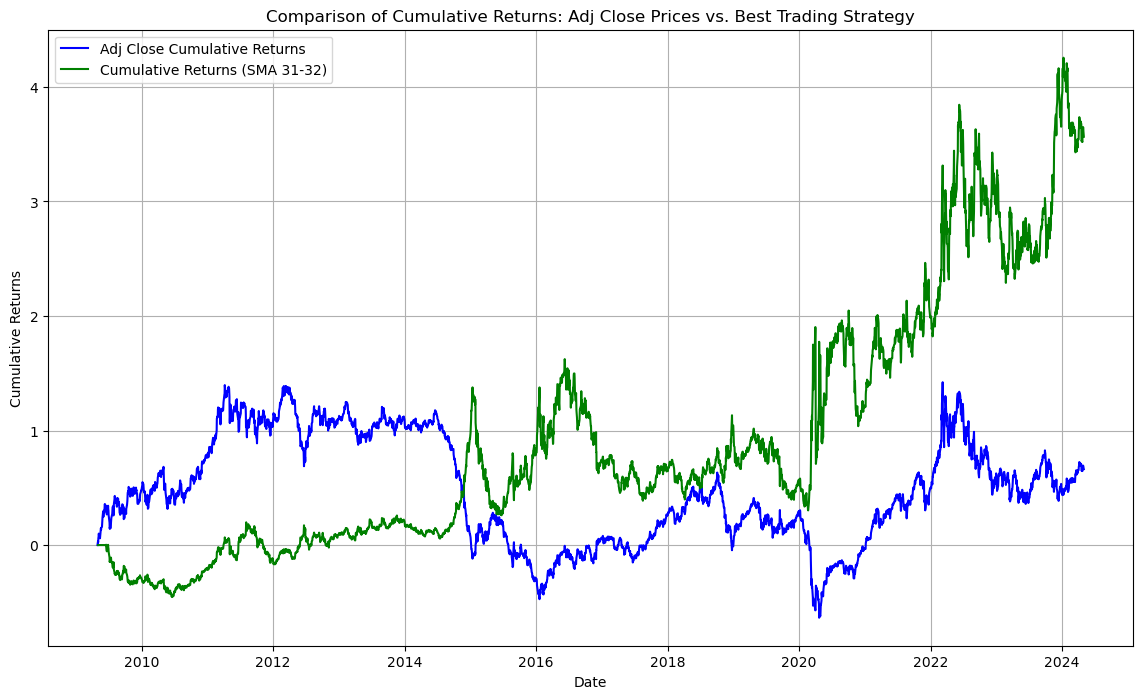

SMA (31, 32): Cumulative Return = 3.5645, Annualized Return = 7.23%, Annualized Standard Deviation = 36.48%, Sharpe Ratio = 0.150
SMA (183, 250): Cumulative Return = 3.5110, Annualized Return = 7.18%, Annualized Standard Deviation = 35.63%, Sharpe Ratio = 0.152
SMA (14, 17): Cumulative Return = 3.4529, Annualized Return = 7.11%, Annualized Standard Deviation = 36.55%, Sharpe Ratio = 0.147
SMA (28, 37): Cumulative Return = 3.3106, Annualized Return = 6.95%, Annualized Standard Deviation = 36.46%, Sharpe Ratio = 0.143
SMA (2, 11): Cumulative Return = 3.3030, Annualized Return = 6.94%, Annualized Standard Deviation = 36.57%, Sharpe Ratio = 0.142
Analyzing Frozen Orange Juice...


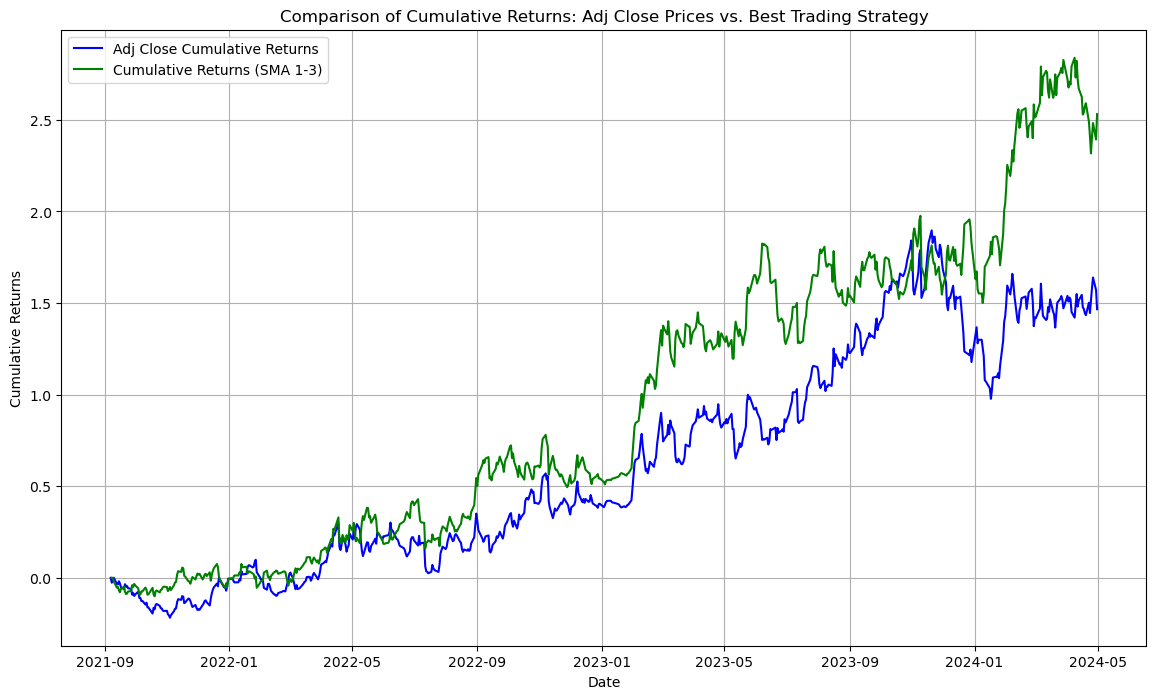

SMA (1, 3): Cumulative Return = 2.5312, Annualized Return = 38.97%, Annualized Standard Deviation = 40.01%, Sharpe Ratio = 0.930
SMA (1, 4): Cumulative Return = 2.4275, Annualized Return = 37.90%, Annualized Standard Deviation = 40.00%, Sharpe Ratio = 0.904
SMA (119, 121): Cumulative Return = 2.3867, Annualized Return = 37.47%, Annualized Standard Deviation = 37.26%, Sharpe Ratio = 0.959
SMA (118, 121): Cumulative Return = 2.2182, Annualized Return = 35.65%, Annualized Standard Deviation = 37.27%, Sharpe Ratio = 0.910
SMA (118, 122): Cumulative Return = 2.2099, Annualized Return = 35.56%, Annualized Standard Deviation = 37.23%, Sharpe Ratio = 0.908
Analyzing Micro Gold...


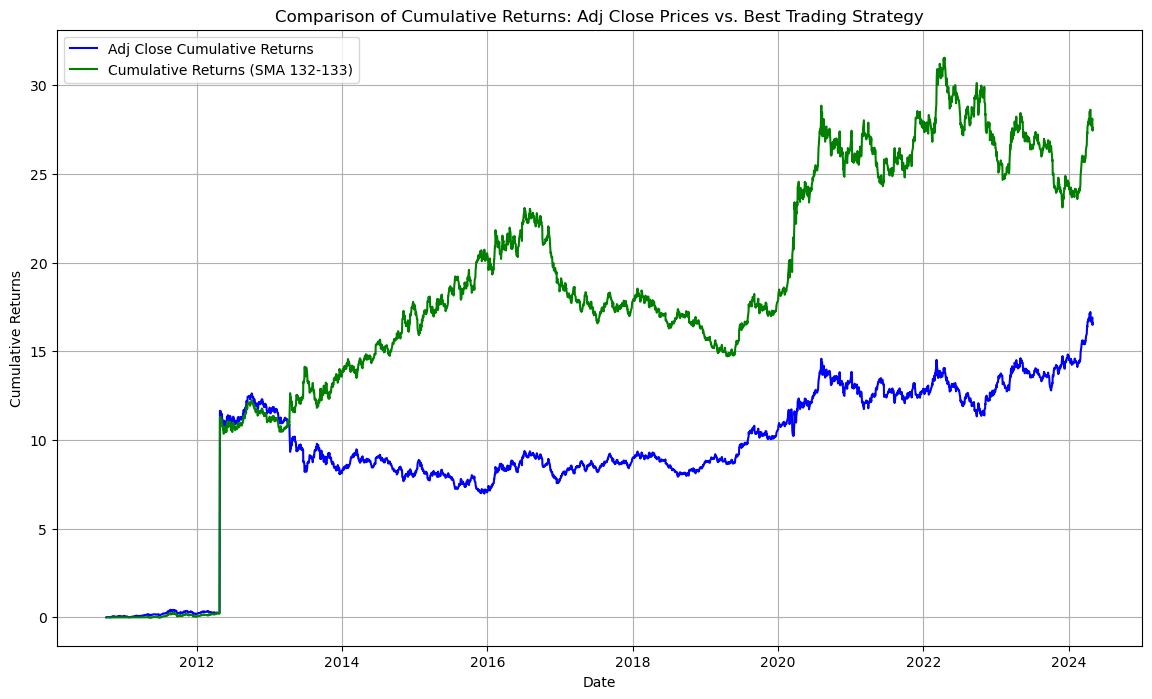

SMA (132, 133): Cumulative Return = 27.6004, Annualized Return = 18.58%, Annualized Standard Deviation = 249.28%, Sharpe Ratio = 0.068
SMA (131, 134): Cumulative Return = 25.8291, Annualized Return = 18.20%, Annualized Standard Deviation = 249.28%, Sharpe Ratio = 0.066
SMA (130, 133): Cumulative Return = 25.0762, Annualized Return = 18.03%, Annualized Standard Deviation = 249.28%, Sharpe Ratio = 0.065
SMA (131, 133): Cumulative Return = 24.7324, Annualized Return = 17.95%, Annualized Standard Deviation = 249.28%, Sharpe Ratio = 0.065
SMA (121, 128): Cumulative Return = 22.2828, Annualized Return = 17.35%, Annualized Standard Deviation = 249.28%, Sharpe Ratio = 0.063
Analyzing Micro Silver...


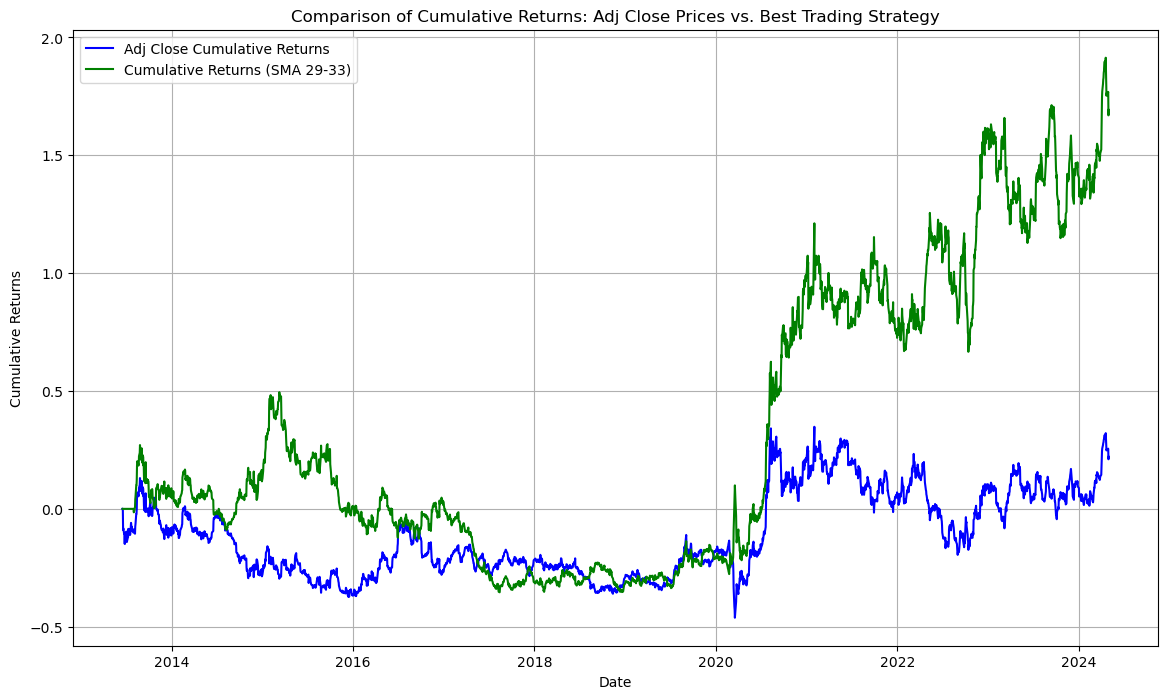

SMA (29, 33): Cumulative Return = 1.6926, Annualized Return = 6.49%, Annualized Standard Deviation = 27.97%, Sharpe Ratio = 0.169
SMA (4, 7): Cumulative Return = 1.6345, Annualized Return = 6.34%, Annualized Standard Deviation = 28.21%, Sharpe Ratio = 0.163
SMA (229, 246): Cumulative Return = 0.9087, Annualized Return = 4.19%, Annualized Standard Deviation = 26.82%, Sharpe Ratio = 0.091
SMA (230, 245): Cumulative Return = 0.8311, Annualized Return = 3.91%, Annualized Standard Deviation = 26.83%, Sharpe Ratio = 0.081
SMA (229, 245): Cumulative Return = 0.7845, Annualized Return = 3.74%, Annualized Standard Deviation = 26.83%, Sharpe Ratio = 0.074
Analyzing Heating Oil...


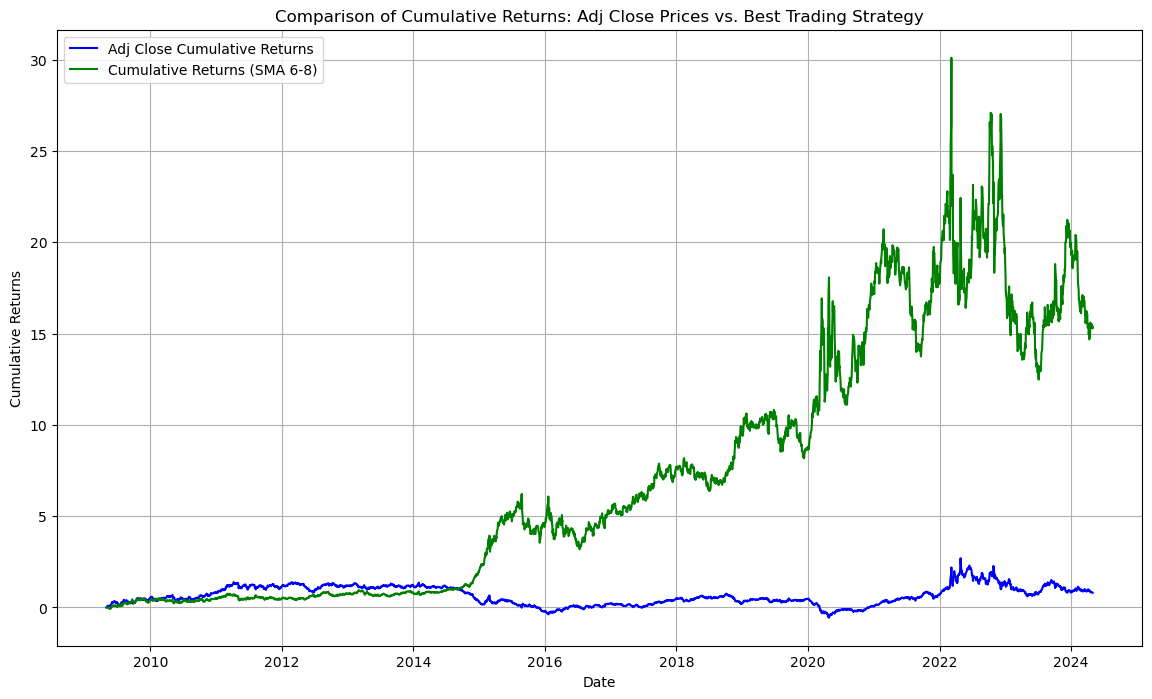

SMA (6, 8): Cumulative Return = 15.3367, Annualized Return = 13.71%, Annualized Standard Deviation = 34.77%, Sharpe Ratio = 0.344
SMA (6, 9): Cumulative Return = 10.7103, Annualized Return = 11.98%, Annualized Standard Deviation = 34.77%, Sharpe Ratio = 0.294
SMA (4, 19): Cumulative Return = 8.0739, Annualized Return = 10.68%, Annualized Standard Deviation = 34.72%, Sharpe Ratio = 0.257
SMA (156, 159): Cumulative Return = 7.8756, Annualized Return = 10.56%, Annualized Standard Deviation = 33.95%, Sharpe Ratio = 0.260
SMA (4, 18): Cumulative Return = 7.7178, Annualized Return = 10.47%, Annualized Standard Deviation = 34.72%, Sharpe Ratio = 0.251
Analyzing RBOB Gasoline...


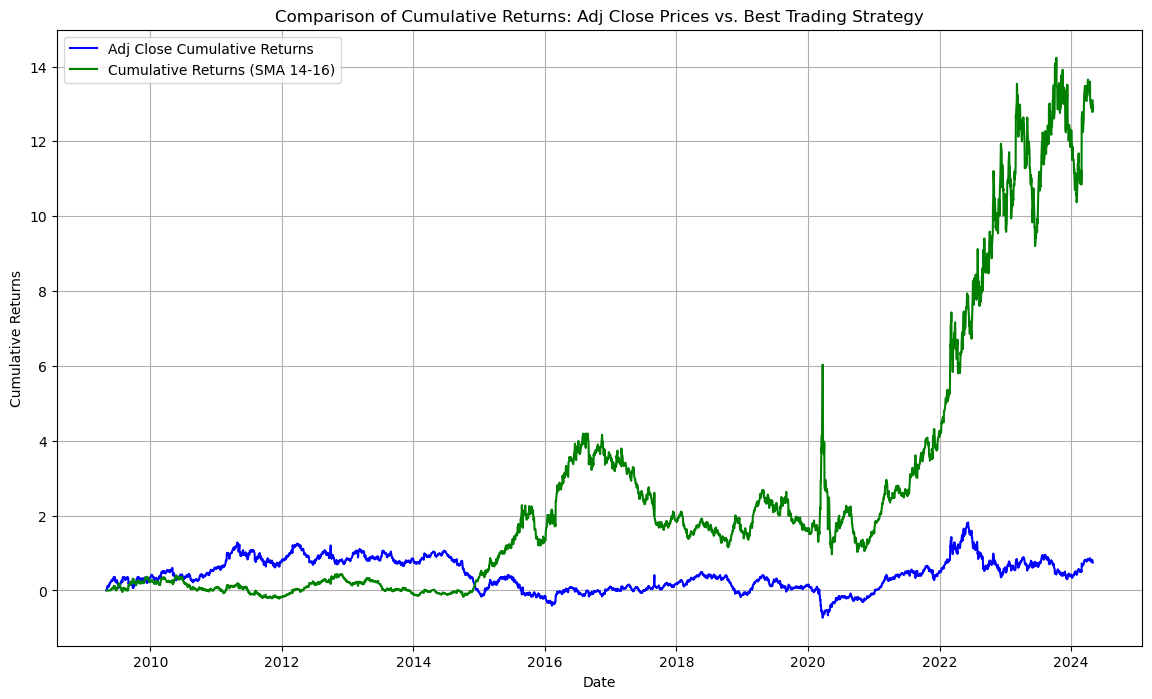

SMA (14, 16): Cumulative Return = 13.0896, Annualized Return = 12.94%, Annualized Standard Deviation = 41.09%, Sharpe Ratio = 0.272
SMA (14, 15): Cumulative Return = 11.4824, Annualized Return = 12.31%, Annualized Standard Deviation = 41.10%, Sharpe Ratio = 0.257
SMA (13, 16): Cumulative Return = 8.2992, Annualized Return = 10.80%, Annualized Standard Deviation = 41.10%, Sharpe Ratio = 0.220
SMA (12, 17): Cumulative Return = 6.4552, Annualized Return = 9.68%, Annualized Standard Deviation = 41.10%, Sharpe Ratio = 0.193
SMA (13, 19): Cumulative Return = 6.4061, Annualized Return = 9.65%, Annualized Standard Deviation = 41.10%, Sharpe Ratio = 0.192
Analyzing Oat Futures...


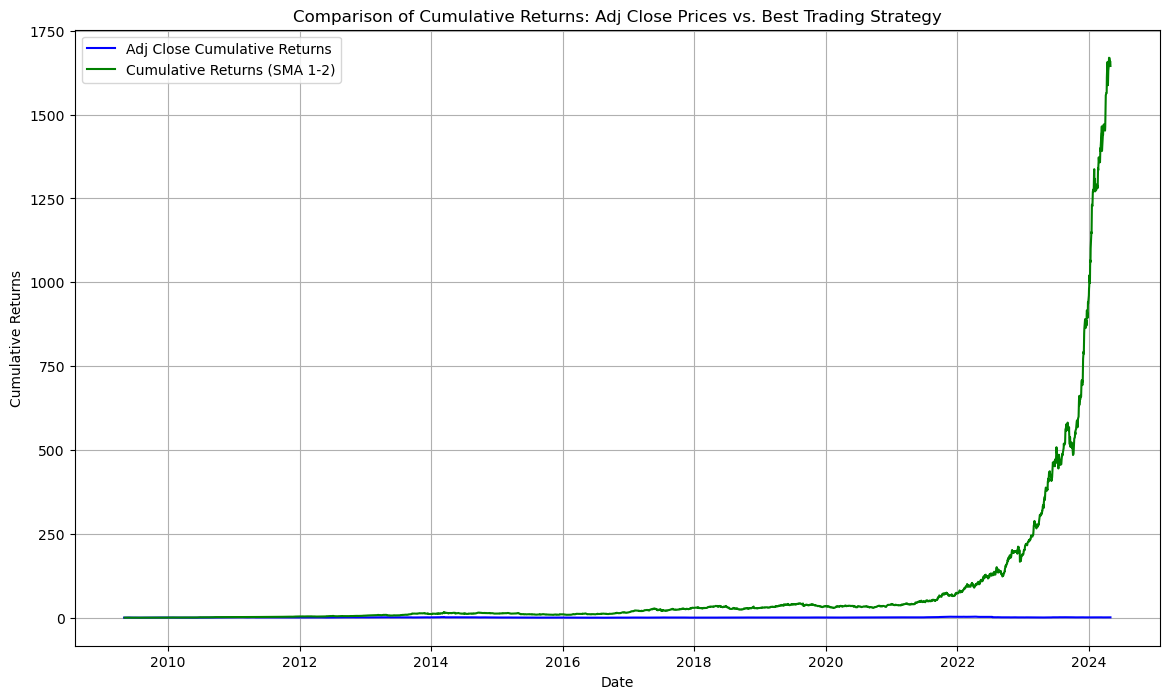

SMA (1, 2): Cumulative Return = 1644.8690, Annualized Return = 40.58%, Annualized Standard Deviation = 34.46%, Sharpe Ratio = 1.127
SMA (1, 3): Cumulative Return = 57.4600, Annualized Return = 20.58%, Annualized Standard Deviation = 36.20%, Sharpe Ratio = 0.520
SMA (1, 4): Cumulative Return = 27.5244, Annualized Return = 16.66%, Annualized Standard Deviation = 36.25%, Sharpe Ratio = 0.411
SMA (1, 5): Cumulative Return = 20.2619, Annualized Return = 15.10%, Annualized Standard Deviation = 36.25%, Sharpe Ratio = 0.368
SMA (178, 179): Cumulative Return = 4.0837, Annualized Return = 7.77%, Annualized Standard Deviation = 35.40%, Sharpe Ratio = 0.170
Analyzing Rough Rice...


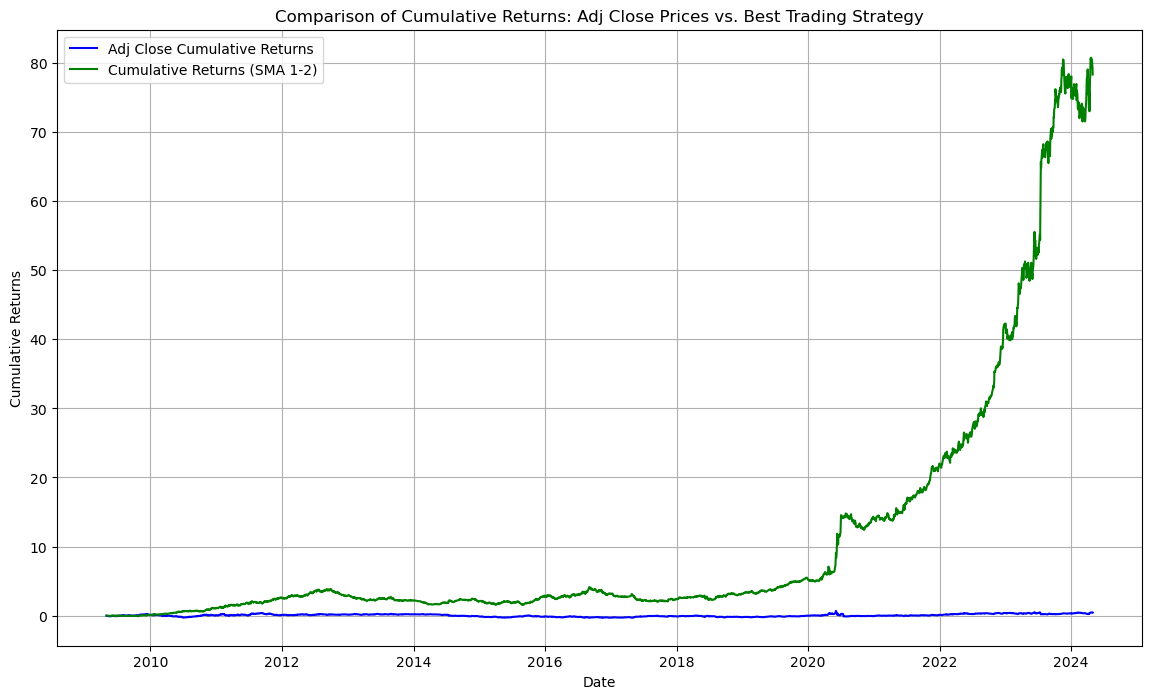

SMA (1, 2): Cumulative Return = 78.3228, Annualized Return = 22.29%, Annualized Standard Deviation = 23.24%, Sharpe Ratio = 0.884
SMA (1, 4): Cumulative Return = 51.8961, Annualized Return = 20.03%, Annualized Standard Deviation = 24.33%, Sharpe Ratio = 0.751
SMA (1, 3): Cumulative Return = 45.0155, Annualized Return = 19.26%, Annualized Standard Deviation = 24.44%, Sharpe Ratio = 0.716
SMA (1, 5): Cumulative Return = 17.5341, Annualized Return = 14.37%, Annualized Standard Deviation = 24.48%, Sharpe Ratio = 0.516
SMA (1, 7): Cumulative Return = 14.5528, Annualized Return = 13.46%, Annualized Standard Deviation = 24.48%, Sharpe Ratio = 0.478
Analyzing Soybean Oil...


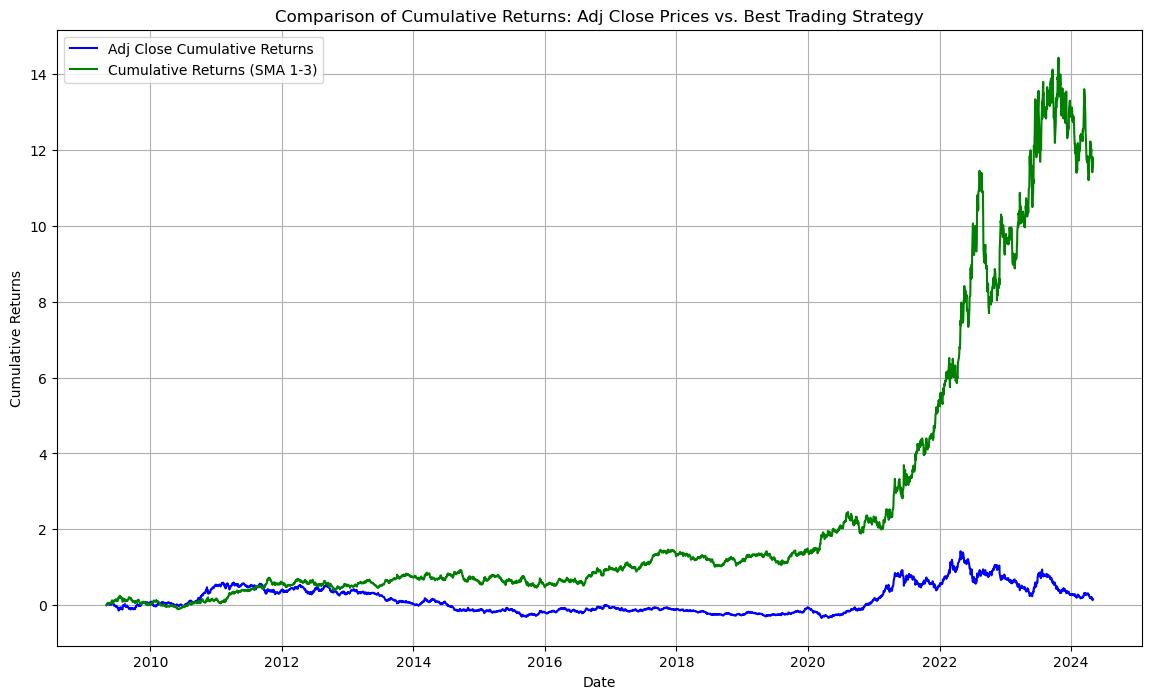

SMA (1, 3): Cumulative Return = 11.5486, Annualized Return = 12.34%, Annualized Standard Deviation = 23.81%, Sharpe Ratio = 0.445
SMA (241, 243): Cumulative Return = 6.8757, Annualized Return = 9.96%, Annualized Standard Deviation = 22.93%, Sharpe Ratio = 0.358
SMA (39, 42): Cumulative Return = 5.2914, Annualized Return = 8.83%, Annualized Standard Deviation = 23.70%, Sharpe Ratio = 0.299
SMA (240, 244): Cumulative Return = 5.1961, Annualized Return = 8.75%, Annualized Standard Deviation = 22.94%, Sharpe Ratio = 0.305
SMA (241, 244): Cumulative Return = 5.1415, Annualized Return = 8.71%, Annualized Standard Deviation = 22.94%, Sharpe Ratio = 0.303
Analyzing Lean Hogs...


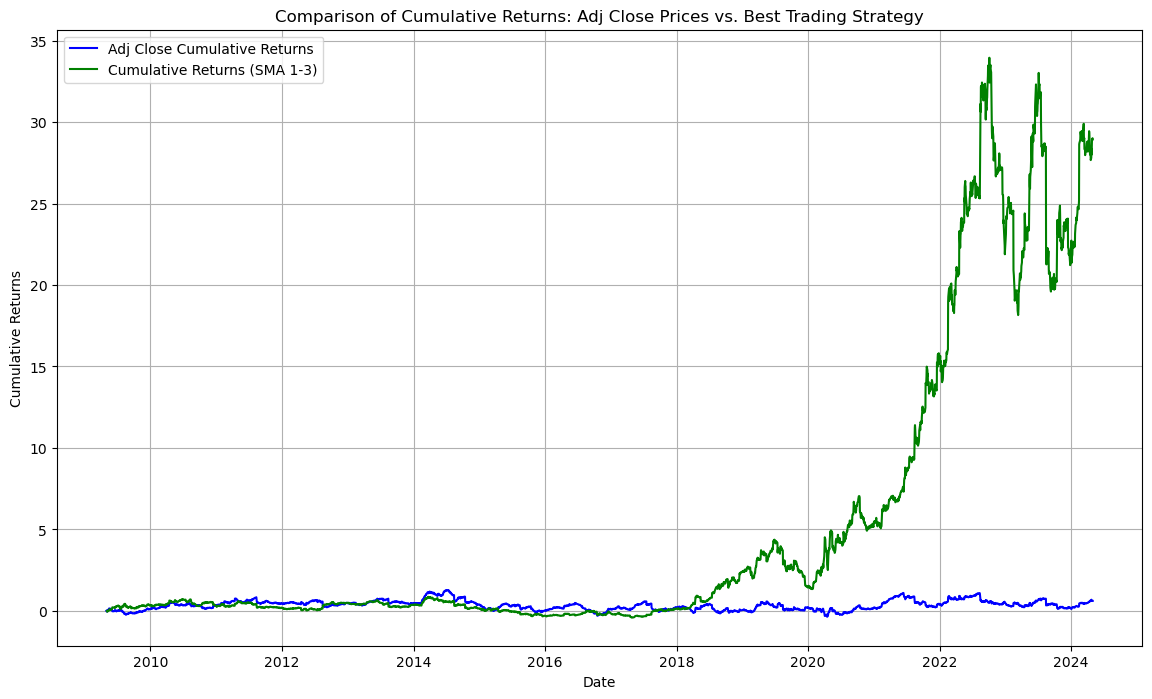

SMA (1, 3): Cumulative Return = 28.9314, Annualized Return = 16.92%, Annualized Standard Deviation = 38.83%, Sharpe Ratio = 0.391
SMA (1, 2): Cumulative Return = 23.9674, Annualized Return = 15.95%, Annualized Standard Deviation = 38.67%, Sharpe Ratio = 0.367
SMA (1, 4): Cumulative Return = 12.4736, Annualized Return = 12.71%, Annualized Standard Deviation = 38.81%, Sharpe Ratio = 0.282
SMA (2, 4): Cumulative Return = 11.7867, Annualized Return = 12.44%, Annualized Standard Deviation = 38.56%, Sharpe Ratio = 0.277
SMA (1, 6): Cumulative Return = 11.2782, Annualized Return = 12.23%, Annualized Standard Deviation = 38.82%, Sharpe Ratio = 0.270
Analyzing Live Cattle...


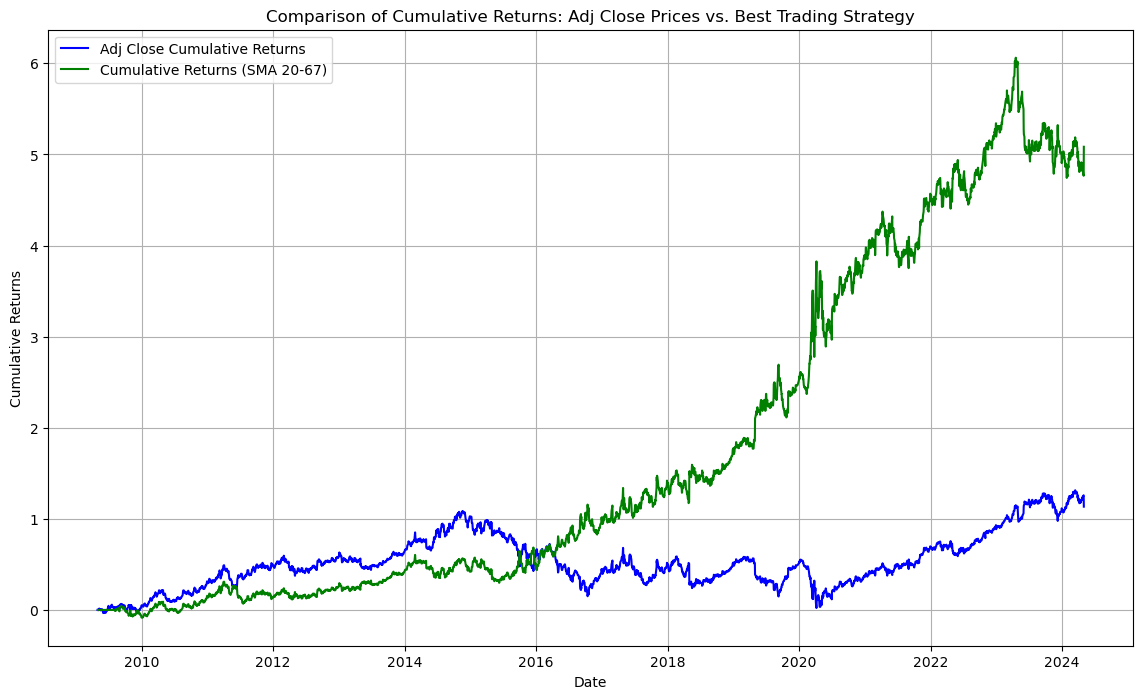

SMA (20, 67): Cumulative Return = 5.0840, Annualized Return = 8.66%, Annualized Standard Deviation = 17.97%, Sharpe Ratio = 0.385
SMA (24, 52): Cumulative Return = 5.0746, Annualized Return = 8.65%, Annualized Standard Deviation = 17.99%, Sharpe Ratio = 0.384
SMA (20, 66): Cumulative Return = 5.0183, Annualized Return = 8.61%, Annualized Standard Deviation = 17.97%, Sharpe Ratio = 0.382
SMA (20, 65): Cumulative Return = 4.9763, Annualized Return = 8.57%, Annualized Standard Deviation = 17.97%, Sharpe Ratio = 0.380
SMA (25, 51): Cumulative Return = 4.7866, Annualized Return = 8.41%, Annualized Standard Deviation = 17.99%, Sharpe Ratio = 0.370
Analyzing Feeder Cattle...


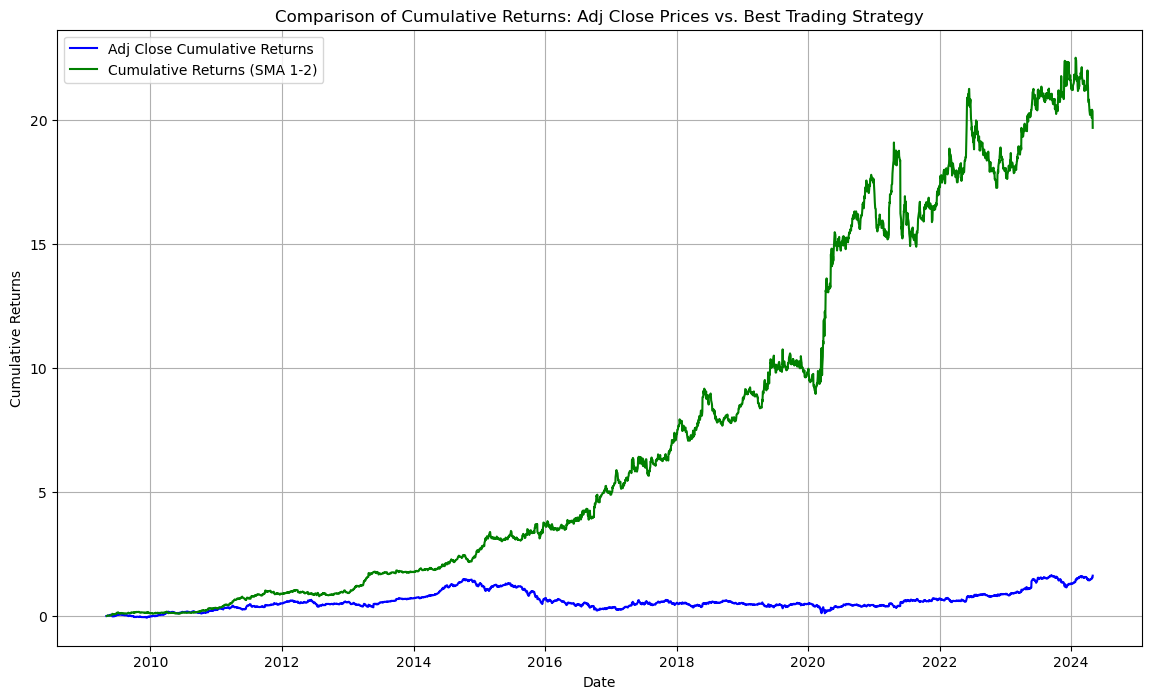

SMA (1, 2): Cumulative Return = 19.6737, Annualized Return = 14.95%, Annualized Standard Deviation = 16.76%, Sharpe Ratio = 0.788
SMA (1, 3): Cumulative Return = 11.4548, Annualized Return = 12.30%, Annualized Standard Deviation = 17.37%, Sharpe Ratio = 0.607
SMA (1, 4): Cumulative Return = 5.7805, Annualized Return = 9.20%, Annualized Standard Deviation = 17.41%, Sharpe Ratio = 0.428
SMA (226, 237): Cumulative Return = 5.5042, Annualized Return = 9.00%, Annualized Standard Deviation = 17.16%, Sharpe Ratio = 0.422
SMA (226, 238): Cumulative Return = 5.3918, Annualized Return = 8.91%, Annualized Standard Deviation = 17.16%, Sharpe Ratio = 0.417
Analyzing Cocoa...


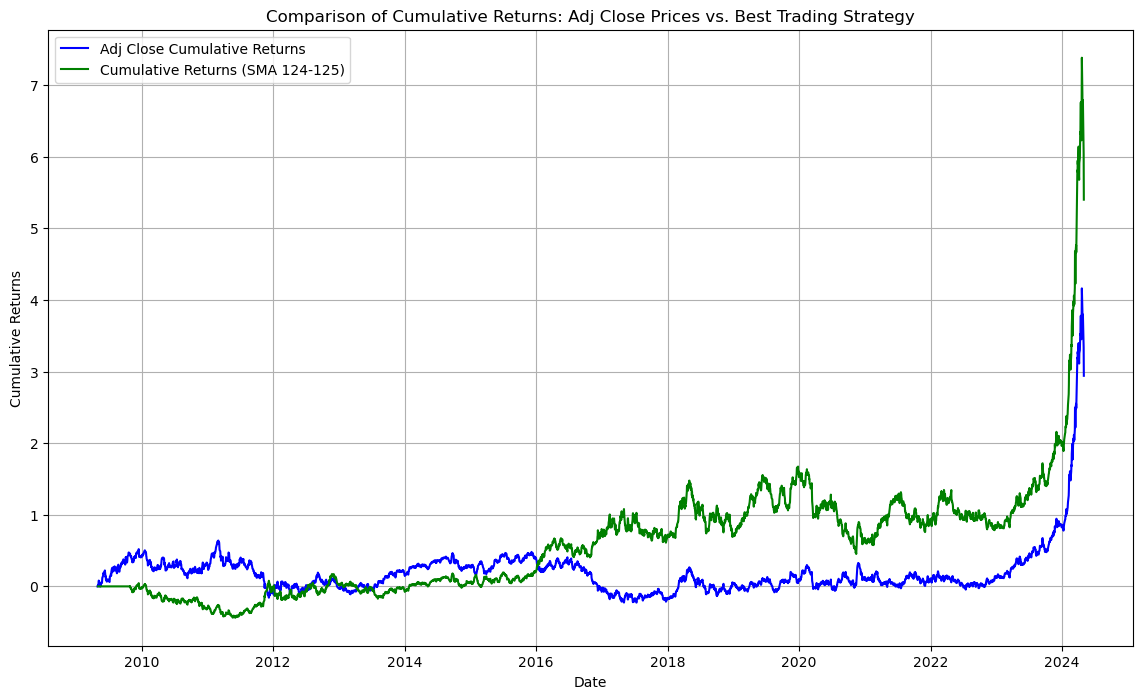

SMA (124, 125): Cumulative Return = 5.4010, Annualized Return = 8.92%, Annualized Standard Deviation = 27.70%, Sharpe Ratio = 0.259
SMA (124, 126): Cumulative Return = 4.8658, Annualized Return = 8.48%, Annualized Standard Deviation = 27.70%, Sharpe Ratio = 0.243
SMA (57, 62): Cumulative Return = 4.3152, Annualized Return = 7.99%, Annualized Standard Deviation = 28.08%, Sharpe Ratio = 0.222
SMA (55, 64): Cumulative Return = 4.0394, Annualized Return = 7.72%, Annualized Standard Deviation = 28.06%, Sharpe Ratio = 0.213
SMA (123, 125): Cumulative Return = 4.0233, Annualized Return = 7.71%, Annualized Standard Deviation = 27.70%, Sharpe Ratio = 0.215


In [31]:
import pandas as pd
import numpy as np

def analyze_all_commodities(commodity_data):
    for commodity_name, data in commodity_data.items():
        if 'Adj Close' in data.columns:  # Ensure the necessary data is available
            # Convert to DataFrame for easier manipulation
            commodity_prices = data['Adj Close'].astype(float).to_frame(name='Adj Close')
            # Calculate daily returns
            commodity_prices['daily_return'] = commodity_prices['Adj Close'].pct_change()

            print(f"Analyzing {commodity_name}...")
            try:
                analyze_sma_strategy(commodity_prices, 'Adj Close', 'daily_return')
            except Exception as e:
                print(f"Failed to analyze {commodity_name} due to an error: {e}")
        else:
            print(f"No 'Adj Close' data available for {commodity_name}")

# Call the function with the commodity_data
analyze_all_commodities(commodity_data)

- SMA Portfolio, equal weighting

# Carry Strategy

In [4]:
# import storage costs
